# Task B: NN

## 0. Load the preprocessed data
**We will use the preprocessed dataset after image processing and PCA. It characterizes 2 different classes (tumor or not) based on 200 features.** 

In [1]:
# Import necessary libraries
import pickle
import numpy as np
import pandas as pd

In [2]:
# Load preprocessed data with help of pickle.
with open('DataAfterProcess/images_AfterProcess.pickle', 'rb') as handle:
    X = pickle.load(handle)
    
with open('DataAfterProcess/label_AfterProcess.pickle', 'rb') as handle:
    y = pickle.load(handle)
    
# Check result.
print(X.shape, y.shape) 

(3000, 300) (3000,)


### Training-Validation-Test

**Split data into training set (81%), validation set (9%) and test set (10%). Note that the test set here comes from the dataset.zip file, not the test.zip file.**

In [3]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [4]:
# Implement one-hot encoding to labels.
y = to_categorical(y)

# Split data into a training set and a test set (90% training and 10% testing data).
# Notice that all random state is chosen as fixed in this assignment to ensure reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size=0.1, random_state=5)

# Split training set into a new training set and a validation set (90% training and 10% validation data).
X_train_new, X_val, y_train_new, y_val = train_test_split(X_train,y_train, 
                                                          test_size=0.1, random_state=5)

# Check result.
print(X_train_new.shape, y_train_new.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape) 
print('train set: {} | val set: {} | test set: {}'.format(round(len(y_train_new)/len(X),3), 
                                                          round(len(y_val)/len(X),3),
                                                          round(len(y_test)/len(X),3)))

(2430, 300) (2430, 4) (270, 300) (270, 4) (300, 300) (300, 4)
train set: 0.81 | val set: 0.09 | test set: 0.1


## 1. Hyperparameter tuning: Trial and error
**In this part, we try to train a neural network and tune the hyperparameter by trial and error, which means we change the hyperparameter of model by checking training and validation loss**

In [5]:
# Import necessary libraries
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras import optimizers, losses, metrics

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Define input,output dimension of the NN, they are fixed!
input_units = X_train.shape[1]
output_units = 4

In [7]:
# This function is used to plot traing loss and validation loss.
def plot_loss(training_history):    
    # Set new figure.
    plt.figure(figsize=(8,6))
    plt.grid()    
    
    # Read loss information wrt.loss from input.      
    history_dict = training_history.history

    tra_loss, val_loss = history_dict['loss'], history_dict['val_loss']
    epochs = range(1,len(tra_loss)+1)

    # Plot trainging loss and validation loss.
    plt.plot(epochs,tra_loss, 'bo', label='Training loss') 
    plt.plot(epochs,val_loss, 'b', label='Validation loss')

    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

### Formulate initial neural network

**Build a neural network with 3 layers: input layer, hidden layer and output layer.**
- Dense hidden layer with 16 units and relu as activation function;
- Epochs and batch size are chosen as 100 and 128;

In [80]:
# Defeine layer variable
hidden_units_ini = 4

# Define training variable
epochs_ini = 100
batch_size_ini = 128

# Create the model.
model_ini = models.Sequential()
model_ini.add(layers.Dense(units=hidden_units_ini, activation='relu', input_shape=[input_units]))
model_ini.add(layers.Dense(units=hidden_units_ini, activation='relu'))
model_ini.add(layers.Dense(units=hidden_units_ini, activation='relu'))
model_ini.add(layers.Dense(units=output_units, activation='softmax'))

# Configure the model with optimizer, loss function and metrics.
model_ini.compile(optimizer=optimizers.Adam(),
                  loss=losses.CategoricalCrossentropy(),
                  metrics=[metrics.CategoricalAccuracy()])

# Check result.
print(model_ini.summary())

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_98 (Dense)             (None, 4)                 1204      
_________________________________________________________________
dense_99 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_100 (Dense)            (None, 4)                 20        
_________________________________________________________________
dense_101 (Dense)            (None, 4)                 20        
Total params: 1,264
Trainable params: 1,264
Non-trainable params: 0
_________________________________________________________________
None


In [81]:
#  Train the model and evaluate with the validation set in every epoch.
history_ini = model_ini.fit(X_train_new,
                            y_train_new,
                            epochs=epochs_ini,
                            batch_size=batch_size_ini,
                            validation_data=(X_val,y_val))

Train on 2430 samples, validate on 270 samples
Epoch 1/100
2430/2430 [==============================] - 0s 180us/sample - loss: 1.5741 - categorical_accuracy: 0.2840 - val_loss: 1.4334 - val_categorical_accuracy: 0.2926
Epoch 2/100
2430/2430 [==============================] - 0s 15us/sample - loss: 1.4286 - categorical_accuracy: 0.3074 - val_loss: 1.3504 - val_categorical_accuracy: 0.3370
Epoch 3/100
2430/2430 [==============================] - 0s 17us/sample - loss: 1.3482 - categorical_accuracy: 0.3412 - val_loss: 1.3008 - val_categorical_accuracy: 0.3630
Epoch 4/100
2430/2430 [==============================] - 0s 14us/sample - loss: 1.2975 - categorical_accuracy: 0.3757 - val_loss: 1.2649 - val_categorical_accuracy: 0.3889
Epoch 5/100
2430/2430 [==============================] - 0s 15us/sample - loss: 1.2600 - categorical_accuracy: 0.3992 - val_loss: 1.2327 - val_categorical_accuracy: 0.3963
Epoch 6/100
2430/2430 [==============================] - 0s 15us/sample - loss: 1.2275 - cat

Epoch 48/100
2430/2430 [==============================] - 0s 14us/sample - loss: 0.4215 - categorical_accuracy: 0.7885 - val_loss: 0.6561 - val_categorical_accuracy: 0.7222
Epoch 49/100
2430/2430 [==============================] - 0s 13us/sample - loss: 0.4110 - categorical_accuracy: 0.7893 - val_loss: 0.6480 - val_categorical_accuracy: 0.7222
Epoch 50/100
2430/2430 [==============================] - 0s 13us/sample - loss: 0.4017 - categorical_accuracy: 0.7909 - val_loss: 0.6471 - val_categorical_accuracy: 0.7259
Epoch 51/100
2430/2430 [==============================] - 0s 14us/sample - loss: 0.3931 - categorical_accuracy: 0.7930 - val_loss: 0.6454 - val_categorical_accuracy: 0.7296
Epoch 52/100
2430/2430 [==============================] - 0s 13us/sample - loss: 0.3840 - categorical_accuracy: 0.8214 - val_loss: 0.6380 - val_categorical_accuracy: 0.7926
Epoch 53/100
2430/2430 [==============================] - 0s 14us/sample - loss: 0.3751 - categorical_accuracy: 0.8967 - val_loss: 0.63

Epoch 95/100
2430/2430 [==============================] - 0s 13us/sample - loss: 0.1767 - categorical_accuracy: 0.9539 - val_loss: 0.6749 - val_categorical_accuracy: 0.8444
Epoch 96/100
2430/2430 [==============================] - 0s 12us/sample - loss: 0.1745 - categorical_accuracy: 0.9539 - val_loss: 0.6857 - val_categorical_accuracy: 0.8519
Epoch 97/100
2430/2430 [==============================] - 0s 13us/sample - loss: 0.1735 - categorical_accuracy: 0.9543 - val_loss: 0.6869 - val_categorical_accuracy: 0.8481
Epoch 98/100
2430/2430 [==============================] - 0s 13us/sample - loss: 0.1716 - categorical_accuracy: 0.9543 - val_loss: 0.6879 - val_categorical_accuracy: 0.8407
Epoch 99/100
2430/2430 [==============================] - 0s 13us/sample - loss: 0.1698 - categorical_accuracy: 0.9551 - val_loss: 0.6997 - val_categorical_accuracy: 0.8444
Epoch 100/100
2430/2430 [==============================] - 0s 12us/sample - loss: 0.1669 - categorical_accuracy: 0.9560 - val_loss: 0.6

### Model validation
**Evaluate the model per validation set by checking confusion matrix, classification report, accuracy score and cohen kappa score.**

270/270 [==============================] - 0s 35us/sample - loss: 0.6988 - categorical_accuracy: 0.8444
[0.6987603721795259, 0.84444445]


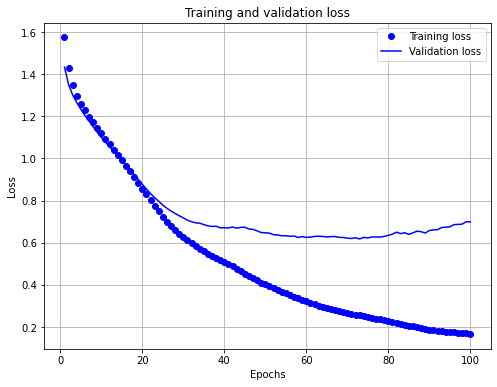

In [82]:
# Plot traing loss and validation loss
plot_loss(history_ini)

# Evaluate model by using validation set.
print(model_ini.evaluate(X_val,y_val))

### Formulate modified neural network
**According to the previous result, we modify the network deeper (more hidden layers) and bigger (more hidden units). To avoid the overfitting, the l2 regularization and drop out layer are also considered.**

In [95]:
# Defeine new layer variable. 
hidden_units_complex = 256
C_complex = 0.002
dropout_ratio_complex = 0.5

# Define training variable
epochs_complex = 200
batch_size_complex = 128

# Create the new model with l2 regularization and drop out layer.
model_complex = models.Sequential()
model_complex.add(layers.Dense(units=hidden_units_complex, activation='relu', 
                               kernel_regularizer=regularizers.l2(C_complex), input_shape=[input_units]))
model_complex.add(layers.Dropout(dropout_ratio_complex))
model_complex.add(layers.Dense(units=hidden_units_complex, activation='relu', 
                               kernel_regularizer=regularizers.l2(C_complex)))
model_complex.add(layers.Dropout(dropout_ratio_complex))
model_complex.add(layers.Dense(units=hidden_units_complex, activation='relu', 
                               kernel_regularizer=regularizers.l2(C_complex)))
model_complex.add(layers.Dropout(dropout_ratio_complex))
model_complex.add(layers.Dense(units=hidden_units_complex, activation='relu', 
                               kernel_regularizer=regularizers.l2(C_complex)))
model_complex.add(layers.Dropout(dropout_ratio_complex))
model_complex.add(layers.Dense(units=hidden_units_complex, activation='relu', 
                               kernel_regularizer=regularizers.l2(C_complex)))
model_complex.add(layers.Dropout(dropout_ratio_complex))
model_complex.add(layers.Dense(units=output_units, activation='softmax'))

# Configure the model with optimizer, loss function and metrics.
model_complex.compile(optimizer=optimizers.RMSprop(),
              loss=losses.CategoricalCrossentropy(),
              metrics=[metrics.CategoricalAccuracy()])

# Check result.
print(model_complex.summary())

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_126 (Dense)            (None, 256)               77056     
_________________________________________________________________
dropout_88 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_127 (Dense)            (None, 256)               65792     
_________________________________________________________________
dropout_89 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_128 (Dense)            (None, 256)               65792     
_________________________________________________________________
dropout_90 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_129 (Dense)            (None, 256)             

In [96]:
#  Train the model and evaluate with the validation set in every epoch.
history_complex = model_complex.fit(X_train_new,
                                    y_train_new,
                                    epochs=epochs_complex,
                                    batch_size=batch_size_complex,
                                    validation_data=(X_val,y_val))

Train on 2430 samples, validate on 270 samples
Epoch 1/200
2430/2430 [==============================] - 1s 443us/sample - loss: 4.0076 - categorical_accuracy: 0.2765 - val_loss: 3.7572 - val_categorical_accuracy: 0.4963
Epoch 2/200
2430/2430 [==============================] - 0s 57us/sample - loss: 3.7286 - categorical_accuracy: 0.3284 - val_loss: 3.5426 - val_categorical_accuracy: 0.5074
Epoch 3/200
2430/2430 [==============================] - 0s 51us/sample - loss: 3.4712 - categorical_accuracy: 0.3979 - val_loss: 3.2144 - val_categorical_accuracy: 0.5407
Epoch 4/200
2430/2430 [==============================] - 0s 50us/sample - loss: 3.1926 - categorical_accuracy: 0.4626 - val_loss: 2.9349 - val_categorical_accuracy: 0.5963
Epoch 5/200
2430/2430 [==============================] - 0s 54us/sample - loss: 2.9374 - categorical_accuracy: 0.5226 - val_loss: 2.6468 - val_categorical_accuracy: 0.6667
Epoch 6/200
2430/2430 [==============================] - 0s 51us/sample - loss: 2.6368 - cat

2430/2430 [==============================] - 0s 55us/sample - loss: 0.1487 - categorical_accuracy: 0.9942 - val_loss: 0.4042 - val_categorical_accuracy: 0.9370
Epoch 96/200
2430/2430 [==============================] - 0s 54us/sample - loss: 0.1597 - categorical_accuracy: 0.9881 - val_loss: 0.3660 - val_categorical_accuracy: 0.9444
Epoch 97/200
2430/2430 [==============================] - 0s 54us/sample - loss: 0.1507 - categorical_accuracy: 0.9918 - val_loss: 0.3645 - val_categorical_accuracy: 0.9407
Epoch 98/200
2430/2430 [==============================] - 0s 51us/sample - loss: 0.1488 - categorical_accuracy: 0.9922 - val_loss: 0.3728 - val_categorical_accuracy: 0.9370
Epoch 99/200
2430/2430 [==============================] - 0s 53us/sample - loss: 0.1436 - categorical_accuracy: 0.9930 - val_loss: 0.3369 - val_categorical_accuracy: 0.9519
Epoch 100/200
2430/2430 [==============================] - 0s 54us/sample - loss: 0.1443 - categorical_accuracy: 0.9926 - val_loss: 0.3258 - val_cat

2430/2430 [==============================] - 0s 56us/sample - loss: 0.1220 - categorical_accuracy: 0.9930 - val_loss: 0.3805 - val_categorical_accuracy: 0.9296
Epoch 190/200
2430/2430 [==============================] - 0s 55us/sample - loss: 0.1263 - categorical_accuracy: 0.9914 - val_loss: 0.3534 - val_categorical_accuracy: 0.9407
Epoch 191/200
2430/2430 [==============================] - 0s 56us/sample - loss: 0.1274 - categorical_accuracy: 0.9922 - val_loss: 0.4497 - val_categorical_accuracy: 0.9148
Epoch 192/200
2430/2430 [==============================] - 0s 56us/sample - loss: 0.1270 - categorical_accuracy: 0.9918 - val_loss: 0.3676 - val_categorical_accuracy: 0.9259
Epoch 193/200
2430/2430 [==============================] - 0s 57us/sample - loss: 0.1279 - categorical_accuracy: 0.9905 - val_loss: 0.4071 - val_categorical_accuracy: 0.9333
Epoch 194/200
2430/2430 [==============================] - 0s 57us/sample - loss: 0.1342 - categorical_accuracy: 0.9905 - val_loss: 0.3875 - val

### Model validation
**Evaluate the model per validation set by checking confusion matrix, classification report, accuracy score and cohen kappa score.**

270/270 [==============================] - 0s 67us/sample - loss: 0.3284 - categorical_accuracy: 0.9481
[0.3283807569079929, 0.94814813]


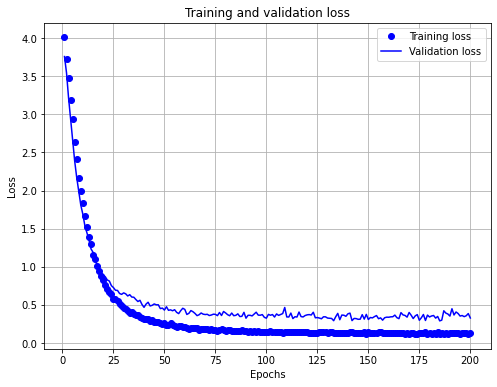

In [107]:
# Plot traing loss and validation loss
plot_loss(history_complex)

# Evaluate model by using validation set.
print(model_complex.evaluate(X_val,y_val))

## 2. Hyperparameter tuning: GridsearchCV 
**Let's also try to tune the hyper-parameters of neural network with help of GridsearchCV(). We tune number of hidden units, drop out ratio and regularization parameter.**

### Implement GrisearchCV

In [37]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [38]:
# This function is used to build and compile model with genreal number of hidden units, drop out ratio and regularzation parameter  
def create_model(hidden_units=16, dropout_ratio=0.2, C=0.02):
    # Create the model.
    model = models.Sequential()    
    model.add(layers.Dense(units=hidden_units, activation='relu', 
                           kernel_regularizer=regularizers.l2(C), input_shape=[input_units]))
    model.add(layers.Dropout(dropout_ratio))
    model.add(layers.Dense(units=hidden_units, activation='relu', 
                           kernel_regularizer=regularizers.l2(C)))
    model.add(layers.Dropout(dropout_ratio))
    model.add(layers.Dense(units=hidden_units, activation='relu', 
                           kernel_regularizer=regularizers.l2(C)))
    model.add(layers.Dropout(dropout_ratio))
    model.add(layers.Dense(units=hidden_units, activation='relu', 
                           kernel_regularizer=regularizers.l2(C)))
    model.add(layers.Dropout(dropout_ratio))
    model.add(layers.Dense(units=hidden_units, activation='relu', 
                           kernel_regularizer=regularizers.l2(C)))
    model.add(layers.Dropout(dropout_ratio))
    model.add(layers.Dense(units=output_units, activation='softmax'))

    # Configure the model with optimizer, loss function and metrics.
    model.compile(optimizer=optimizers.Adam(),
                  loss=losses.CategoricalCrossentropy(),
                  metrics=['accuracy'])

    return model


# Create a model wrapper with help of KerasClassifier().
model_grid = KerasClassifier(build_fn=create_model, epochs=200,batch_size=128, verbose=1)

In [100]:
# Create a dictionary called param_grid and fill out some parameters for hidden units, C and drop out ratio.
hidden_units_grid = [128,256]
C_grid = [0.002,0.02]
dropout_ratio_grid = [0.2,0.5]

param_grid = dict(hidden_units=hidden_units_grid,
                  C=C_grid,
                  dropout_ratio=dropout_ratio_grid)

In [101]:
# Create a GridSearchCV() object and fit it to the training data, also evaluate with validation data.
grid = GridSearchCV(model_grid, param_grid=param_grid)
grid_result = grid.fit(X_train_new,
                       y_train_new,
                       validation_data=(X_val,y_val))

Train on 1944 samples, validate on 270 samples
Epoch 1/200
1944/1944 [==============================] - 1s 506us/sample - loss: 2.4236 - accuracy: 0.3606 - val_loss: 2.1789 - val_accuracy: 0.5630
Epoch 2/200
1944/1944 [==============================] - 0s 37us/sample - loss: 2.1059 - accuracy: 0.5463 - val_loss: 1.8356 - val_accuracy: 0.6704
Epoch 3/200
1944/1944 [==============================] - 0s 36us/sample - loss: 1.7958 - accuracy: 0.6734 - val_loss: 1.5692 - val_accuracy: 0.7444
Epoch 4/200
1944/1944 [==============================] - 0s 36us/sample - loss: 1.5856 - accuracy: 0.7526 - val_loss: 1.3981 - val_accuracy: 0.8000
Epoch 5/200
1944/1944 [==============================] - 0s 36us/sample - loss: 1.3846 - accuracy: 0.8210 - val_loss: 1.2806 - val_accuracy: 0.8333
Epoch 6/200
1944/1944 [==============================] - 0s 36us/sample - loss: 1.2641 - accuracy: 0.8596 - val_loss: 1.1957 - val_accuracy: 0.8593
Epoch 7/200
1944/1944 [==============================] - 0s 35us

Epoch 56/200
1944/1944 [==============================] - 0s 29us/sample - loss: 0.1820 - accuracy: 0.9943 - val_loss: 0.4303 - val_accuracy: 0.9148
Epoch 57/200
1944/1944 [==============================] - 0s 28us/sample - loss: 0.1748 - accuracy: 0.9969 - val_loss: 0.4385 - val_accuracy: 0.9111
Epoch 58/200
1944/1944 [==============================] - 0s 27us/sample - loss: 0.1714 - accuracy: 0.9969 - val_loss: 0.4476 - val_accuracy: 0.9111
Epoch 59/200
1944/1944 [==============================] - 0s 27us/sample - loss: 0.1663 - accuracy: 0.9959 - val_loss: 0.4387 - val_accuracy: 0.9111
Epoch 60/200
1944/1944 [==============================] - 0s 27us/sample - loss: 0.1594 - accuracy: 0.9985 - val_loss: 0.4243 - val_accuracy: 0.9222
Epoch 61/200
1944/1944 [==============================] - 0s 27us/sample - loss: 0.1532 - accuracy: 0.9985 - val_loss: 0.4111 - val_accuracy: 0.9185
Epoch 62/200
1944/1944 [==============================] - 0s 27us/sample - loss: 0.1514 - accuracy: 0.9990

Epoch 111/200
1944/1944 [==============================] - 0s 28us/sample - loss: 0.0843 - accuracy: 0.9985 - val_loss: 0.2771 - val_accuracy: 0.9296
Epoch 112/200
1944/1944 [==============================] - 0s 27us/sample - loss: 0.0858 - accuracy: 0.9974 - val_loss: 0.2886 - val_accuracy: 0.9222
Epoch 113/200
1944/1944 [==============================] - 0s 26us/sample - loss: 0.0836 - accuracy: 0.9990 - val_loss: 0.2956 - val_accuracy: 0.9148
Epoch 114/200
1944/1944 [==============================] - 0s 27us/sample - loss: 0.0830 - accuracy: 0.9990 - val_loss: 0.2917 - val_accuracy: 0.9222
Epoch 115/200
1944/1944 [==============================] - 0s 28us/sample - loss: 0.0801 - accuracy: 1.0000 - val_loss: 0.2971 - val_accuracy: 0.9296
Epoch 116/200
1944/1944 [==============================] - 0s 29us/sample - loss: 0.0838 - accuracy: 0.9974 - val_loss: 0.3119 - val_accuracy: 0.9185
Epoch 117/200
1944/1944 [==============================] - 0s 28us/sample - loss: 0.0845 - accuracy:

Epoch 19/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.6074 - accuracy: 0.9794 - val_loss: 0.8657 - val_accuracy: 0.9148
Epoch 20/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.5667 - accuracy: 0.9918 - val_loss: 0.8520 - val_accuracy: 0.9259
Epoch 21/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.5540 - accuracy: 0.9877 - val_loss: 0.8278 - val_accuracy: 0.9222
Epoch 22/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.5302 - accuracy: 0.9902 - val_loss: 0.8128 - val_accuracy: 0.9111
Epoch 23/200
1944/1944 [==============================] - 0s 29us/sample - loss: 0.5091 - accuracy: 0.9902 - val_loss: 0.7964 - val_accuracy: 0.9148
Epoch 24/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.4994 - accuracy: 0.9861 - val_loss: 0.7779 - val_accuracy: 0.9222
Epoch 25/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.4847 - accuracy: 0.9877

Epoch 74/200
1944/1944 [==============================] - 0s 27us/sample - loss: 0.1295 - accuracy: 0.9969 - val_loss: 0.4239 - val_accuracy: 0.9222
Epoch 75/200
1944/1944 [==============================] - 0s 28us/sample - loss: 0.1305 - accuracy: 0.9959 - val_loss: 0.4346 - val_accuracy: 0.9148
Epoch 76/200
1944/1944 [==============================] - 0s 27us/sample - loss: 0.1274 - accuracy: 0.9969 - val_loss: 0.4367 - val_accuracy: 0.9259
Epoch 77/200
1944/1944 [==============================] - 0s 28us/sample - loss: 0.1272 - accuracy: 0.9969 - val_loss: 0.4247 - val_accuracy: 0.9185
Epoch 78/200
1944/1944 [==============================] - 0s 28us/sample - loss: 0.1243 - accuracy: 0.9964 - val_loss: 0.4292 - val_accuracy: 0.9148
Epoch 79/200
1944/1944 [==============================] - 0s 28us/sample - loss: 0.1235 - accuracy: 0.9964 - val_loss: 0.4265 - val_accuracy: 0.9074
Epoch 80/200
1944/1944 [==============================] - 0s 29us/sample - loss: 0.1210 - accuracy: 0.9959

Epoch 129/200
1944/1944 [==============================] - 0s 29us/sample - loss: 0.0782 - accuracy: 0.9995 - val_loss: 0.3410 - val_accuracy: 0.9259
Epoch 130/200
1944/1944 [==============================] - 0s 28us/sample - loss: 0.0769 - accuracy: 0.9990 - val_loss: 0.3461 - val_accuracy: 0.9222
Epoch 131/200
1944/1944 [==============================] - 0s 28us/sample - loss: 0.0774 - accuracy: 0.9974 - val_loss: 0.3557 - val_accuracy: 0.9259
Epoch 132/200
1944/1944 [==============================] - 0s 27us/sample - loss: 0.0737 - accuracy: 1.0000 - val_loss: 0.3561 - val_accuracy: 0.9259
Epoch 133/200
1944/1944 [==============================] - 0s 28us/sample - loss: 0.0727 - accuracy: 1.0000 - val_loss: 0.3622 - val_accuracy: 0.9222
Epoch 134/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.0727 - accuracy: 1.0000 - val_loss: 0.3629 - val_accuracy: 0.9185
Epoch 135/200
1944/1944 [==============================] - 0s 28us/sample - loss: 0.0784 - accuracy:

1944/1944 [==============================] - 0s 33us/sample - loss: 0.2954 - accuracy: 0.9959 - val_loss: 0.6027 - val_accuracy: 0.9148
Epoch 38/200
1944/1944 [==============================] - 0s 35us/sample - loss: 0.2891 - accuracy: 0.9959 - val_loss: 0.6093 - val_accuracy: 0.9074
Epoch 39/200
1944/1944 [==============================] - 0s 35us/sample - loss: 0.2823 - accuracy: 0.9933 - val_loss: 0.6016 - val_accuracy: 0.9111
Epoch 40/200
1944/1944 [==============================] - 0s 33us/sample - loss: 0.2710 - accuracy: 0.9949 - val_loss: 0.6058 - val_accuracy: 0.9148
Epoch 41/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.2603 - accuracy: 0.9969 - val_loss: 0.6142 - val_accuracy: 0.9148
Epoch 42/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.2547 - accuracy: 0.9964 - val_loss: 0.5883 - val_accuracy: 0.9037
Epoch 43/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.2471 - accuracy: 0.9964 - val_loss: 

Epoch 146/200
1944/1944 [==============================] - 0s 29us/sample - loss: 0.0730 - accuracy: 0.9995 - val_loss: 0.2974 - val_accuracy: 0.9222
Epoch 147/200
1944/1944 [==============================] - 0s 29us/sample - loss: 0.0709 - accuracy: 1.0000 - val_loss: 0.2704 - val_accuracy: 0.9296
Epoch 148/200
1944/1944 [==============================] - 0s 29us/sample - loss: 0.0705 - accuracy: 0.9995 - val_loss: 0.2875 - val_accuracy: 0.9296
Epoch 149/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.0692 - accuracy: 0.9995 - val_loss: 0.3085 - val_accuracy: 0.9222
Epoch 150/200
1944/1944 [==============================] - 0s 29us/sample - loss: 0.0666 - accuracy: 1.0000 - val_loss: 0.3269 - val_accuracy: 0.9222
Epoch 151/200
1944/1944 [==============================] - 0s 28us/sample - loss: 0.0684 - accuracy: 0.9990 - val_loss: 0.3247 - val_accuracy: 0.9222
Epoch 152/200
1944/1944 [==============================] - 0s 29us/sample - loss: 0.0679 - accuracy:

1944/1944 [==============================] - 0s 34us/sample - loss: 0.1851 - accuracy: 0.9979 - val_loss: 0.5580 - val_accuracy: 0.9037
Epoch 55/200
1944/1944 [==============================] - 0s 33us/sample - loss: 0.1781 - accuracy: 0.9990 - val_loss: 0.5501 - val_accuracy: 0.9037
Epoch 56/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.1771 - accuracy: 0.9969 - val_loss: 0.5444 - val_accuracy: 0.9074
Epoch 57/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.1690 - accuracy: 0.9990 - val_loss: 0.5242 - val_accuracy: 0.9111
Epoch 58/200
1944/1944 [==============================] - 0s 33us/sample - loss: 0.1658 - accuracy: 0.9995 - val_loss: 0.5297 - val_accuracy: 0.9111
Epoch 59/200
1944/1944 [==============================] - 0s 33us/sample - loss: 0.1599 - accuracy: 0.9985 - val_loss: 0.5071 - val_accuracy: 0.9074
Epoch 60/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.1594 - accuracy: 0.9985 - val_loss: 

1944/1944 [==============================] - 0s 30us/sample - loss: 0.1028 - accuracy: 0.9959 - val_loss: 0.4062 - val_accuracy: 0.9000
Epoch 110/200
1944/1944 [==============================] - 0s 29us/sample - loss: 0.1047 - accuracy: 0.9969 - val_loss: 0.4148 - val_accuracy: 0.9000
Epoch 111/200
1944/1944 [==============================] - 0s 29us/sample - loss: 0.1035 - accuracy: 0.9964 - val_loss: 0.4834 - val_accuracy: 0.9037
Epoch 112/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.1026 - accuracy: 0.9964 - val_loss: 0.4219 - val_accuracy: 0.9111
Epoch 113/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.0991 - accuracy: 0.9985 - val_loss: 0.4204 - val_accuracy: 0.9037
Epoch 114/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.0986 - accuracy: 0.9964 - val_loss: 0.4094 - val_accuracy: 0.9148
Epoch 115/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.0996 - accuracy: 0.9943 - val_

Epoch 164/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.0844 - accuracy: 0.9995 - val_loss: 0.3809 - val_accuracy: 0.9111
Epoch 165/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.0839 - accuracy: 0.9990 - val_loss: 0.3540 - val_accuracy: 0.9222
Epoch 166/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.0844 - accuracy: 0.9985 - val_loss: 0.3646 - val_accuracy: 0.9148
Epoch 167/200
1944/1944 [==============================] - 0s 29us/sample - loss: 0.0804 - accuracy: 0.9995 - val_loss: 0.3555 - val_accuracy: 0.9259
Epoch 168/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.0795 - accuracy: 0.9990 - val_loss: 0.3508 - val_accuracy: 0.9222
Epoch 169/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.0790 - accuracy: 0.9995 - val_loss: 0.3280 - val_accuracy: 0.9185
Epoch 170/200
1944/1944 [==============================] - 0s 29us/sample - loss: 0.0782 - accuracy:

Epoch 18/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.6061 - accuracy: 0.9830 - val_loss: 0.9026 - val_accuracy: 0.9148
Epoch 19/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.5805 - accuracy: 0.9871 - val_loss: 0.8850 - val_accuracy: 0.8963
Epoch 20/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.5558 - accuracy: 0.9882 - val_loss: 0.8575 - val_accuracy: 0.9037
Epoch 21/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.5454 - accuracy: 0.9861 - val_loss: 0.8336 - val_accuracy: 0.9074
Epoch 22/200
1944/1944 [==============================] - 0s 33us/sample - loss: 0.5252 - accuracy: 0.9871 - val_loss: 0.8074 - val_accuracy: 0.9111
Epoch 23/200
1944/1944 [==============================] - 0s 33us/sample - loss: 0.4978 - accuracy: 0.9902 - val_loss: 0.8011 - val_accuracy: 0.9074
Epoch 24/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.4903 - accuracy: 0.9907

Epoch 73/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.1306 - accuracy: 0.9959 - val_loss: 0.4731 - val_accuracy: 0.8926
Epoch 74/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.1315 - accuracy: 0.9979 - val_loss: 0.4649 - val_accuracy: 0.9000
Epoch 75/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.1296 - accuracy: 0.9959 - val_loss: 0.4971 - val_accuracy: 0.8926
Epoch 76/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.1235 - accuracy: 0.9974 - val_loss: 0.4982 - val_accuracy: 0.9000
Epoch 77/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.1208 - accuracy: 0.9974 - val_loss: 0.5052 - val_accuracy: 0.9000
Epoch 78/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.1216 - accuracy: 0.9964 - val_loss: 0.4543 - val_accuracy: 0.9037
Epoch 79/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.1168 - accuracy: 0.9985

Epoch 128/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.0978 - accuracy: 0.9923 - val_loss: 0.4343 - val_accuracy: 0.9185
Epoch 129/200
1944/1944 [==============================] - 0s 29us/sample - loss: 0.0939 - accuracy: 0.9954 - val_loss: 0.4243 - val_accuracy: 0.9148
Epoch 130/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.0994 - accuracy: 0.9954 - val_loss: 0.4367 - val_accuracy: 0.9148
Epoch 131/200
1944/1944 [==============================] - 0s 29us/sample - loss: 0.1055 - accuracy: 0.9933 - val_loss: 0.4352 - val_accuracy: 0.9000
Epoch 132/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.0968 - accuracy: 0.9959 - val_loss: 0.4319 - val_accuracy: 0.9000
Epoch 133/200
1944/1944 [==============================] - 0s 29us/sample - loss: 0.1001 - accuracy: 0.9959 - val_loss: 0.4431 - val_accuracy: 0.9037
Epoch 134/200
1944/1944 [==============================] - 0s 29us/sample - loss: 0.0987 - accuracy:

1944/1944 [==============================] - 0s 47us/sample - loss: 0.2725 - accuracy: 0.9969 - val_loss: 0.5582 - val_accuracy: 0.9222
Epoch 37/200
1944/1944 [==============================] - 0s 46us/sample - loss: 0.2651 - accuracy: 0.9969 - val_loss: 0.5572 - val_accuracy: 0.9111
Epoch 38/200
1944/1944 [==============================] - 0s 47us/sample - loss: 0.2642 - accuracy: 0.9943 - val_loss: 0.5377 - val_accuracy: 0.9111
Epoch 39/200
1944/1944 [==============================] - 0s 47us/sample - loss: 0.2537 - accuracy: 0.9949 - val_loss: 0.4943 - val_accuracy: 0.9074
Epoch 40/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.2394 - accuracy: 0.9949 - val_loss: 0.4845 - val_accuracy: 0.8926
Epoch 41/200
1944/1944 [==============================] - 0s 46us/sample - loss: 0.2344 - accuracy: 0.9933 - val_loss: 0.5177 - val_accuracy: 0.9185
Epoch 42/200
1944/1944 [==============================] - 0s 47us/sample - loss: 0.2274 - accuracy: 0.9928 - val_loss: 

1944/1944 [==============================] - 0s 47us/sample - loss: 0.0894 - accuracy: 0.9990 - val_loss: 0.3160 - val_accuracy: 0.9296
Epoch 92/200
1944/1944 [==============================] - 0s 47us/sample - loss: 0.0862 - accuracy: 0.9985 - val_loss: 0.3277 - val_accuracy: 0.9148
Epoch 93/200
1944/1944 [==============================] - 0s 47us/sample - loss: 0.0865 - accuracy: 0.9990 - val_loss: 0.3314 - val_accuracy: 0.9259
Epoch 94/200
1944/1944 [==============================] - 0s 47us/sample - loss: 0.0834 - accuracy: 0.9974 - val_loss: 0.3099 - val_accuracy: 0.9222
Epoch 95/200
1944/1944 [==============================] - 0s 46us/sample - loss: 0.0827 - accuracy: 0.9979 - val_loss: 0.3598 - val_accuracy: 0.9111
Epoch 96/200
1944/1944 [==============================] - 0s 47us/sample - loss: 0.0841 - accuracy: 0.9974 - val_loss: 0.3426 - val_accuracy: 0.9259
Epoch 97/200
1944/1944 [==============================] - 0s 46us/sample - loss: 0.0816 - accuracy: 0.9979 - val_loss: 

Epoch 146/200
1944/1944 [==============================] - 0s 47us/sample - loss: 0.0783 - accuracy: 0.9969 - val_loss: 0.3871 - val_accuracy: 0.9037
Epoch 147/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.1017 - accuracy: 0.9902 - val_loss: 0.3733 - val_accuracy: 0.9222
Epoch 148/200
1944/1944 [==============================] - 0s 46us/sample - loss: 0.1596 - accuracy: 0.9753 - val_loss: 0.5294 - val_accuracy: 0.8667
Epoch 149/200
1944/1944 [==============================] - 0s 46us/sample - loss: 0.2099 - accuracy: 0.9604 - val_loss: 0.5978 - val_accuracy: 0.8370
Epoch 150/200
1944/1944 [==============================] - 0s 46us/sample - loss: 0.2163 - accuracy: 0.9681 - val_loss: 0.4859 - val_accuracy: 0.9037
Epoch 151/200
1944/1944 [==============================] - 0s 47us/sample - loss: 0.2034 - accuracy: 0.9784 - val_loss: 0.4990 - val_accuracy: 0.8963
Epoch 152/200
1944/1944 [==============================] - 0s 47us/sample - loss: 0.1852 - accuracy:

1944/1944 [==============================] - 0s 47us/sample - loss: 0.1312 - accuracy: 0.9995 - val_loss: 0.4217 - val_accuracy: 0.9185
Epoch 55/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.1271 - accuracy: 0.9985 - val_loss: 0.3953 - val_accuracy: 0.9185
Epoch 56/200
1944/1944 [==============================] - 0s 47us/sample - loss: 0.1259 - accuracy: 0.9985 - val_loss: 0.3981 - val_accuracy: 0.9222
Epoch 57/200
1944/1944 [==============================] - 0s 47us/sample - loss: 0.1237 - accuracy: 0.9985 - val_loss: 0.4043 - val_accuracy: 0.9148
Epoch 58/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.1206 - accuracy: 0.9995 - val_loss: 0.3918 - val_accuracy: 0.9222
Epoch 59/200
1944/1944 [==============================] - 0s 47us/sample - loss: 0.1210 - accuracy: 0.9964 - val_loss: 0.3867 - val_accuracy: 0.9148
Epoch 60/200
1944/1944 [==============================] - 0s 47us/sample - loss: 0.1254 - accuracy: 0.9964 - val_loss: 

1944/1944 [==============================] - 0s 48us/sample - loss: 0.1376 - accuracy: 0.9923 - val_loss: 0.4720 - val_accuracy: 0.9000
Epoch 110/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.1275 - accuracy: 0.9949 - val_loss: 0.5188 - val_accuracy: 0.9000
Epoch 111/200
1944/1944 [==============================] - 0s 47us/sample - loss: 0.1292 - accuracy: 0.9943 - val_loss: 0.5425 - val_accuracy: 0.8963
Epoch 112/200
1944/1944 [==============================] - 0s 52us/sample - loss: 0.1250 - accuracy: 0.9954 - val_loss: 0.5434 - val_accuracy: 0.8926
Epoch 113/200
1944/1944 [==============================] - 0s 47us/sample - loss: 0.1179 - accuracy: 0.9985 - val_loss: 0.5659 - val_accuracy: 0.8926
Epoch 114/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.1144 - accuracy: 0.9974 - val_loss: 0.4981 - val_accuracy: 0.8963
Epoch 115/200
1944/1944 [==============================] - 0s 47us/sample - loss: 0.1086 - accuracy: 0.9979 - val_

Epoch 164/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.1631 - accuracy: 0.9918 - val_loss: 0.5871 - val_accuracy: 0.9037
Epoch 165/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.1538 - accuracy: 0.9954 - val_loss: 0.5824 - val_accuracy: 0.9000
Epoch 166/200
1944/1944 [==============================] - 0s 47us/sample - loss: 0.1435 - accuracy: 0.9979 - val_loss: 0.5698 - val_accuracy: 0.9037
Epoch 167/200
1944/1944 [==============================] - 0s 47us/sample - loss: 0.1329 - accuracy: 0.9995 - val_loss: 0.5680 - val_accuracy: 0.9000
Epoch 168/200
1944/1944 [==============================] - 0s 47us/sample - loss: 0.1286 - accuracy: 0.9990 - val_loss: 0.5435 - val_accuracy: 0.9037
Epoch 169/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.1210 - accuracy: 1.0000 - val_loss: 0.5287 - val_accuracy: 0.9074
Epoch 170/200
1944/1944 [==============================] - 0s 47us/sample - loss: 0.1150 - accuracy:

Epoch 18/200
1944/1944 [==============================] - 0s 47us/sample - loss: 0.7020 - accuracy: 0.9851 - val_loss: 0.9149 - val_accuracy: 0.9333
Epoch 19/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.6530 - accuracy: 0.9923 - val_loss: 0.8945 - val_accuracy: 0.9111
Epoch 20/200
1944/1944 [==============================] - 0s 46us/sample - loss: 0.6080 - accuracy: 0.9959 - val_loss: 0.8975 - val_accuracy: 0.9259
Epoch 21/200
1944/1944 [==============================] - 0s 47us/sample - loss: 0.5753 - accuracy: 0.9959 - val_loss: 0.8465 - val_accuracy: 0.9148
Epoch 22/200
1944/1944 [==============================] - 0s 46us/sample - loss: 0.5410 - accuracy: 0.9949 - val_loss: 0.8125 - val_accuracy: 0.9185
Epoch 23/200
1944/1944 [==============================] - 0s 47us/sample - loss: 0.5148 - accuracy: 0.9954 - val_loss: 0.8087 - val_accuracy: 0.9185
Epoch 24/200
1944/1944 [==============================] - 0s 46us/sample - loss: 0.4893 - accuracy: 0.9918

Epoch 73/200
1944/1944 [==============================] - 0s 47us/sample - loss: 0.1529 - accuracy: 0.9871 - val_loss: 0.3705 - val_accuracy: 0.9185
Epoch 74/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.1501 - accuracy: 0.9923 - val_loss: 0.3765 - val_accuracy: 0.9259
Epoch 75/200
1944/1944 [==============================] - 0s 47us/sample - loss: 0.1440 - accuracy: 0.9928 - val_loss: 0.4737 - val_accuracy: 0.9148
Epoch 76/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.1475 - accuracy: 0.9918 - val_loss: 0.4293 - val_accuracy: 0.9222
Epoch 77/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.1366 - accuracy: 0.9969 - val_loss: 0.4085 - val_accuracy: 0.9296
Epoch 78/200
1944/1944 [==============================] - 0s 47us/sample - loss: 0.1324 - accuracy: 0.9964 - val_loss: 0.4113 - val_accuracy: 0.9333
Epoch 79/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.1246 - accuracy: 0.9990

Epoch 128/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.0733 - accuracy: 0.9990 - val_loss: 0.3344 - val_accuracy: 0.9185
Epoch 129/200
1944/1944 [==============================] - 0s 47us/sample - loss: 0.0714 - accuracy: 1.0000 - val_loss: 0.3294 - val_accuracy: 0.9333
Epoch 130/200
1944/1944 [==============================] - 0s 47us/sample - loss: 0.0688 - accuracy: 0.9995 - val_loss: 0.3113 - val_accuracy: 0.9370
Epoch 131/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.0670 - accuracy: 1.0000 - val_loss: 0.3183 - val_accuracy: 0.9296
Epoch 132/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.0664 - accuracy: 1.0000 - val_loss: 0.3112 - val_accuracy: 0.9333
Epoch 133/200
1944/1944 [==============================] - 0s 47us/sample - loss: 0.0700 - accuracy: 0.9979 - val_loss: 0.2920 - val_accuracy: 0.9370
Epoch 134/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.0715 - accuracy:

1944/1944 [==============================] - 0s 51us/sample - loss: 0.2677 - accuracy: 0.9985 - val_loss: 0.5857 - val_accuracy: 0.9111
Epoch 37/200
1944/1944 [==============================] - 0s 47us/sample - loss: 0.2596 - accuracy: 0.9954 - val_loss: 0.5570 - val_accuracy: 0.9148
Epoch 38/200
1944/1944 [==============================] - 0s 47us/sample - loss: 0.2512 - accuracy: 0.9938 - val_loss: 0.5790 - val_accuracy: 0.8852
Epoch 39/200
1944/1944 [==============================] - 0s 47us/sample - loss: 0.2377 - accuracy: 0.9974 - val_loss: 0.5757 - val_accuracy: 0.8963
Epoch 40/200
1944/1944 [==============================] - 0s 46us/sample - loss: 0.2316 - accuracy: 0.9954 - val_loss: 0.5565 - val_accuracy: 0.9111
Epoch 41/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.2214 - accuracy: 0.9959 - val_loss: 0.5403 - val_accuracy: 0.8926
Epoch 42/200
1944/1944 [==============================] - 0s 46us/sample - loss: 0.2097 - accuracy: 0.9969 - val_loss: 

1944/1944 [==============================] - 0s 51us/sample - loss: 0.1114 - accuracy: 1.0000 - val_loss: 0.3987 - val_accuracy: 0.9148
Epoch 92/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.1064 - accuracy: 1.0000 - val_loss: 0.3782 - val_accuracy: 0.9222
Epoch 93/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.1041 - accuracy: 1.0000 - val_loss: 0.3621 - val_accuracy: 0.9259
Epoch 94/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.0997 - accuracy: 1.0000 - val_loss: 0.3564 - val_accuracy: 0.9148
Epoch 95/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.0979 - accuracy: 0.9995 - val_loss: 0.3592 - val_accuracy: 0.9222
Epoch 96/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.0967 - accuracy: 0.9990 - val_loss: 0.3391 - val_accuracy: 0.9259
Epoch 97/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.0918 - accuracy: 0.9995 - val_loss: 

Epoch 146/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.0881 - accuracy: 1.0000 - val_loss: 0.3951 - val_accuracy: 0.9222
Epoch 147/200
1944/1944 [==============================] - 0s 47us/sample - loss: 0.0863 - accuracy: 0.9995 - val_loss: 0.3818 - val_accuracy: 0.9222
Epoch 148/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.0837 - accuracy: 1.0000 - val_loss: 0.3819 - val_accuracy: 0.9222
Epoch 149/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.0818 - accuracy: 1.0000 - val_loss: 0.3747 - val_accuracy: 0.9222
Epoch 150/200
1944/1944 [==============================] - 0s 47us/sample - loss: 0.0804 - accuracy: 0.9995 - val_loss: 0.3647 - val_accuracy: 0.9222
Epoch 151/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.0780 - accuracy: 1.0000 - val_loss: 0.3676 - val_accuracy: 0.9222
Epoch 152/200
1944/1944 [==============================] - 0s 46us/sample - loss: 0.0774 - accuracy:

1944/1944 [==============================] - 0s 49us/sample - loss: 0.1522 - accuracy: 0.9938 - val_loss: 0.5001 - val_accuracy: 0.9111
Epoch 55/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.1552 - accuracy: 0.9938 - val_loss: 0.5130 - val_accuracy: 0.9037
Epoch 56/200
1944/1944 [==============================] - 0s 47us/sample - loss: 0.1816 - accuracy: 0.9882 - val_loss: 0.4375 - val_accuracy: 0.9074
Epoch 57/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.2043 - accuracy: 0.9820 - val_loss: 0.4597 - val_accuracy: 0.9037
Epoch 58/200
1944/1944 [==============================] - 0s 47us/sample - loss: 0.2178 - accuracy: 0.9774 - val_loss: 0.4979 - val_accuracy: 0.9037
Epoch 59/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.1983 - accuracy: 0.9913 - val_loss: 0.5572 - val_accuracy: 0.9111
Epoch 60/200
1944/1944 [==============================] - 0s 47us/sample - loss: 0.1823 - accuracy: 0.9928 - val_loss: 

1944/1944 [==============================] - 0s 49us/sample - loss: 0.0861 - accuracy: 0.9985 - val_loss: 0.3858 - val_accuracy: 0.9222
Epoch 110/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.0826 - accuracy: 0.9995 - val_loss: 0.3837 - val_accuracy: 0.9185
Epoch 111/200
1944/1944 [==============================] - 0s 47us/sample - loss: 0.0800 - accuracy: 0.9990 - val_loss: 0.3702 - val_accuracy: 0.9259
Epoch 112/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.0781 - accuracy: 0.9990 - val_loss: 0.3829 - val_accuracy: 0.9222
Epoch 113/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.0766 - accuracy: 0.9995 - val_loss: 0.3703 - val_accuracy: 0.9259
Epoch 114/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.0747 - accuracy: 0.9990 - val_loss: 0.3433 - val_accuracy: 0.9222
Epoch 115/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.0756 - accuracy: 0.9985 - val_

Epoch 164/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.0645 - accuracy: 0.9990 - val_loss: 0.3473 - val_accuracy: 0.9222
Epoch 165/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.0629 - accuracy: 1.0000 - val_loss: 0.3435 - val_accuracy: 0.9259
Epoch 166/200
1944/1944 [==============================] - 0s 47us/sample - loss: 0.0620 - accuracy: 0.9995 - val_loss: 0.3485 - val_accuracy: 0.9222
Epoch 167/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.0639 - accuracy: 0.9990 - val_loss: 0.3239 - val_accuracy: 0.9222
Epoch 168/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.0653 - accuracy: 0.9990 - val_loss: 0.3440 - val_accuracy: 0.9222
Epoch 169/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.0648 - accuracy: 0.9979 - val_loss: 0.3611 - val_accuracy: 0.9037
Epoch 170/200
1944/1944 [==============================] - 0s 47us/sample - loss: 0.0627 - accuracy:

Epoch 18/200
1944/1944 [==============================] - 0s 34us/sample - loss: 1.2274 - accuracy: 0.8014 - val_loss: 1.1060 - val_accuracy: 0.8407
Epoch 19/200
1944/1944 [==============================] - 0s 34us/sample - loss: 1.1792 - accuracy: 0.8133 - val_loss: 1.0683 - val_accuracy: 0.8407
Epoch 20/200
1944/1944 [==============================] - 0s 33us/sample - loss: 1.1208 - accuracy: 0.8318 - val_loss: 1.0348 - val_accuracy: 0.8519
Epoch 21/200
1944/1944 [==============================] - 0s 35us/sample - loss: 1.0509 - accuracy: 0.8416 - val_loss: 1.0133 - val_accuracy: 0.8741
Epoch 22/200
1944/1944 [==============================] - 0s 33us/sample - loss: 1.0157 - accuracy: 0.8601 - val_loss: 0.9684 - val_accuracy: 0.8852
Epoch 23/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.9822 - accuracy: 0.8699 - val_loss: 0.9490 - val_accuracy: 0.8741
Epoch 24/200
1944/1944 [==============================] - 0s 33us/sample - loss: 0.9350 - accuracy: 0.8786

Epoch 73/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.2854 - accuracy: 0.9897 - val_loss: 0.5499 - val_accuracy: 0.9185
Epoch 74/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.2825 - accuracy: 0.9877 - val_loss: 0.5539 - val_accuracy: 0.9222
Epoch 75/200
1944/1944 [==============================] - 0s 33us/sample - loss: 0.2805 - accuracy: 0.9871 - val_loss: 0.5430 - val_accuracy: 0.9259
Epoch 76/200
1944/1944 [==============================] - 0s 79us/sample - loss: 0.2798 - accuracy: 0.9846 - val_loss: 0.5256 - val_accuracy: 0.9296
Epoch 77/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.2670 - accuracy: 0.9887 - val_loss: 0.5096 - val_accuracy: 0.9333
Epoch 78/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.2610 - accuracy: 0.9897 - val_loss: 0.5140 - val_accuracy: 0.9296
Epoch 79/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.2583 - accuracy: 0.9907

Epoch 128/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.1683 - accuracy: 0.9902 - val_loss: 0.4109 - val_accuracy: 0.9296
Epoch 129/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.1574 - accuracy: 0.9943 - val_loss: 0.4028 - val_accuracy: 0.9259
Epoch 130/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.1661 - accuracy: 0.9897 - val_loss: 0.4164 - val_accuracy: 0.9185
Epoch 131/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.1630 - accuracy: 0.9918 - val_loss: 0.4309 - val_accuracy: 0.9185
Epoch 132/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.1593 - accuracy: 0.9943 - val_loss: 0.4463 - val_accuracy: 0.9259
Epoch 133/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.1540 - accuracy: 0.9949 - val_loss: 0.4429 - val_accuracy: 0.9259
Epoch 134/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.1649 - accuracy:

1944/1944 [==============================] - 0s 31us/sample - loss: 0.5804 - accuracy: 0.9624 - val_loss: 0.8451 - val_accuracy: 0.8963
Epoch 37/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.5798 - accuracy: 0.9594 - val_loss: 0.8333 - val_accuracy: 0.8926
Epoch 38/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.5748 - accuracy: 0.9583 - val_loss: 0.8365 - val_accuracy: 0.8963
Epoch 39/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.5481 - accuracy: 0.9614 - val_loss: 0.8244 - val_accuracy: 0.9074
Epoch 40/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.5149 - accuracy: 0.9671 - val_loss: 0.8156 - val_accuracy: 0.9037
Epoch 41/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.5183 - accuracy: 0.9676 - val_loss: 0.8260 - val_accuracy: 0.8963
Epoch 42/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.4942 - accuracy: 0.9666 - val_loss: 

1944/1944 [==============================] - 0s 30us/sample - loss: 0.2254 - accuracy: 0.9866 - val_loss: 0.5878 - val_accuracy: 0.9148
Epoch 92/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.2316 - accuracy: 0.9835 - val_loss: 0.5821 - val_accuracy: 0.9111
Epoch 93/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.2200 - accuracy: 0.9918 - val_loss: 0.5808 - val_accuracy: 0.9148
Epoch 94/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.2208 - accuracy: 0.9907 - val_loss: 0.5772 - val_accuracy: 0.9037
Epoch 95/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.2182 - accuracy: 0.9871 - val_loss: 0.5859 - val_accuracy: 0.9000
Epoch 96/200
1944/1944 [==============================] - 0s 29us/sample - loss: 0.2169 - accuracy: 0.9892 - val_loss: 0.5808 - val_accuracy: 0.9074
Epoch 97/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.2070 - accuracy: 0.9882 - val_loss: 

Epoch 146/200
1944/1944 [==============================] - 0s 29us/sample - loss: 0.1654 - accuracy: 0.9887 - val_loss: 0.5499 - val_accuracy: 0.9037
Epoch 147/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.1567 - accuracy: 0.9933 - val_loss: 0.5307 - val_accuracy: 0.9185
Epoch 148/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.1601 - accuracy: 0.9913 - val_loss: 0.5354 - val_accuracy: 0.9074
Epoch 149/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.1520 - accuracy: 0.9954 - val_loss: 0.5336 - val_accuracy: 0.9222
Epoch 150/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.1603 - accuracy: 0.9913 - val_loss: 0.5291 - val_accuracy: 0.9222
Epoch 151/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.1657 - accuracy: 0.9887 - val_loss: 0.5111 - val_accuracy: 0.9111
Epoch 152/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.1600 - accuracy:

1944/1944 [==============================] - 0s 29us/sample - loss: 0.3858 - accuracy: 0.9825 - val_loss: 0.6062 - val_accuracy: 0.9296
Epoch 55/200
1944/1944 [==============================] - 0s 29us/sample - loss: 0.3751 - accuracy: 0.9846 - val_loss: 0.6235 - val_accuracy: 0.9259
Epoch 56/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.3674 - accuracy: 0.9835 - val_loss: 0.6056 - val_accuracy: 0.9222
Epoch 57/200
1944/1944 [==============================] - 0s 29us/sample - loss: 0.3624 - accuracy: 0.9820 - val_loss: 0.5851 - val_accuracy: 0.9370
Epoch 58/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.3482 - accuracy: 0.9877 - val_loss: 0.5937 - val_accuracy: 0.9333
Epoch 59/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.3539 - accuracy: 0.9820 - val_loss: 0.5747 - val_accuracy: 0.9407
Epoch 60/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.3414 - accuracy: 0.9861 - val_loss: 

1944/1944 [==============================] - 0s 32us/sample - loss: 0.1879 - accuracy: 0.9923 - val_loss: 0.4166 - val_accuracy: 0.9370
Epoch 110/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.1851 - accuracy: 0.9933 - val_loss: 0.4135 - val_accuracy: 0.9370
Epoch 111/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.1806 - accuracy: 0.9923 - val_loss: 0.4240 - val_accuracy: 0.9407
Epoch 112/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.1823 - accuracy: 0.9887 - val_loss: 0.4219 - val_accuracy: 0.9407
Epoch 113/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.1804 - accuracy: 0.9918 - val_loss: 0.3966 - val_accuracy: 0.9407
Epoch 114/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.1853 - accuracy: 0.9887 - val_loss: 0.4140 - val_accuracy: 0.9407
Epoch 115/200
1944/1944 [==============================] - 0s 29us/sample - loss: 0.1818 - accuracy: 0.9866 - val_

Epoch 164/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.1630 - accuracy: 0.9892 - val_loss: 0.4051 - val_accuracy: 0.9444
Epoch 165/200
1944/1944 [==============================] - 0s 29us/sample - loss: 0.1586 - accuracy: 0.9882 - val_loss: 0.4027 - val_accuracy: 0.9333
Epoch 166/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.1436 - accuracy: 0.9959 - val_loss: 0.3865 - val_accuracy: 0.9444
Epoch 167/200
1944/1944 [==============================] - 0s 29us/sample - loss: 0.1474 - accuracy: 0.9923 - val_loss: 0.4033 - val_accuracy: 0.9370
Epoch 168/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.1466 - accuracy: 0.9943 - val_loss: 0.4338 - val_accuracy: 0.9259
Epoch 169/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.1500 - accuracy: 0.9928 - val_loss: 0.4304 - val_accuracy: 0.9222
Epoch 170/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.1512 - accuracy:

Epoch 18/200
1944/1944 [==============================] - 0s 35us/sample - loss: 1.2265 - accuracy: 0.7999 - val_loss: 1.1311 - val_accuracy: 0.8148
Epoch 19/200
1944/1944 [==============================] - 0s 34us/sample - loss: 1.1836 - accuracy: 0.8184 - val_loss: 1.0971 - val_accuracy: 0.8222
Epoch 20/200
1944/1944 [==============================] - 0s 33us/sample - loss: 1.1333 - accuracy: 0.8282 - val_loss: 1.0737 - val_accuracy: 0.8370
Epoch 21/200
1944/1944 [==============================] - 0s 32us/sample - loss: 1.0707 - accuracy: 0.8483 - val_loss: 1.0443 - val_accuracy: 0.8444
Epoch 22/200
1944/1944 [==============================] - 0s 33us/sample - loss: 1.0232 - accuracy: 0.8652 - val_loss: 1.0177 - val_accuracy: 0.8519
Epoch 23/200
1944/1944 [==============================] - 0s 33us/sample - loss: 0.9610 - accuracy: 0.8740 - val_loss: 0.9848 - val_accuracy: 0.8593
Epoch 24/200
1944/1944 [==============================] - 0s 34us/sample - loss: 0.9222 - accuracy: 0.8884

Epoch 73/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.2783 - accuracy: 0.9866 - val_loss: 0.6790 - val_accuracy: 0.8963
Epoch 74/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.2799 - accuracy: 0.9871 - val_loss: 0.6631 - val_accuracy: 0.9037
Epoch 75/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.2656 - accuracy: 0.9887 - val_loss: 0.6663 - val_accuracy: 0.9074
Epoch 76/200
1944/1944 [==============================] - 0s 33us/sample - loss: 0.2646 - accuracy: 0.9882 - val_loss: 0.6731 - val_accuracy: 0.9074
Epoch 77/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.2635 - accuracy: 0.9887 - val_loss: 0.6752 - val_accuracy: 0.8926
Epoch 78/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.2652 - accuracy: 0.9856 - val_loss: 0.6631 - val_accuracy: 0.8963
Epoch 79/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.2502 - accuracy: 0.9887

Epoch 128/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.1688 - accuracy: 0.9938 - val_loss: 0.5120 - val_accuracy: 0.9074
Epoch 129/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.1739 - accuracy: 0.9887 - val_loss: 0.5170 - val_accuracy: 0.9148
Epoch 130/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.1677 - accuracy: 0.9928 - val_loss: 0.5048 - val_accuracy: 0.9148
Epoch 131/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.1724 - accuracy: 0.9882 - val_loss: 0.5117 - val_accuracy: 0.9074
Epoch 132/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.1647 - accuracy: 0.9923 - val_loss: 0.5096 - val_accuracy: 0.9185
Epoch 133/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.1636 - accuracy: 0.9918 - val_loss: 0.5146 - val_accuracy: 0.9074
Epoch 134/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.1706 - accuracy:

1944/1944 [==============================] - 0s 30us/sample - loss: 0.5898 - accuracy: 0.9609 - val_loss: 0.7759 - val_accuracy: 0.9111
Epoch 36/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.5842 - accuracy: 0.9630 - val_loss: 0.7720 - val_accuracy: 0.9222
Epoch 37/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.5664 - accuracy: 0.9635 - val_loss: 0.7753 - val_accuracy: 0.9185
Epoch 38/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.5404 - accuracy: 0.9686 - val_loss: 0.7614 - val_accuracy: 0.9296
Epoch 39/200
1944/1944 [==============================] - 0s 33us/sample - loss: 0.5357 - accuracy: 0.9630 - val_loss: 0.7520 - val_accuracy: 0.9296
Epoch 40/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.5085 - accuracy: 0.9712 - val_loss: 0.7522 - val_accuracy: 0.9259
Epoch 41/200
1944/1944 [==============================] - 0s 33us/sample - loss: 0.5041 - accuracy: 0.9722 - val_loss: 

1944/1944 [==============================] - 0s 31us/sample - loss: 0.2031 - accuracy: 0.9933 - val_loss: 0.5063 - val_accuracy: 0.9222
Epoch 91/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.2012 - accuracy: 0.9923 - val_loss: 0.5036 - val_accuracy: 0.9259
Epoch 92/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.2221 - accuracy: 0.9846 - val_loss: 0.4950 - val_accuracy: 0.9259
Epoch 93/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.1946 - accuracy: 0.9943 - val_loss: 0.4802 - val_accuracy: 0.9370
Epoch 94/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.2049 - accuracy: 0.9887 - val_loss: 0.4905 - val_accuracy: 0.9185
Epoch 95/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.2013 - accuracy: 0.9897 - val_loss: 0.4667 - val_accuracy: 0.9333
Epoch 96/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.2071 - accuracy: 0.9861 - val_loss: 

Epoch 145/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.1497 - accuracy: 0.9923 - val_loss: 0.4804 - val_accuracy: 0.9111
Epoch 146/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.1498 - accuracy: 0.9923 - val_loss: 0.4624 - val_accuracy: 0.9148
Epoch 147/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.1469 - accuracy: 0.9949 - val_loss: 0.4511 - val_accuracy: 0.9259
Epoch 148/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.1554 - accuracy: 0.9887 - val_loss: 0.4612 - val_accuracy: 0.9222
Epoch 149/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.1477 - accuracy: 0.9918 - val_loss: 0.4688 - val_accuracy: 0.9185
Epoch 150/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.1533 - accuracy: 0.9902 - val_loss: 0.4820 - val_accuracy: 0.9074
Epoch 151/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.1572 - accuracy:

Epoch 53/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.3526 - accuracy: 0.9938 - val_loss: 0.5748 - val_accuracy: 0.9148
Epoch 54/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.3519 - accuracy: 0.9882 - val_loss: 0.5854 - val_accuracy: 0.9185
Epoch 55/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.3421 - accuracy: 0.9907 - val_loss: 0.5982 - val_accuracy: 0.9111
Epoch 56/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.3328 - accuracy: 0.9892 - val_loss: 0.5759 - val_accuracy: 0.9296
Epoch 57/200
1944/1944 [==============================] - 0s 47us/sample - loss: 0.3252 - accuracy: 0.9892 - val_loss: 0.5386 - val_accuracy: 0.9259
Epoch 58/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.3182 - accuracy: 0.9923 - val_loss: 0.5483 - val_accuracy: 0.9185
Epoch 59/200
1944/1944 [==============================] - 0s 47us/sample - loss: 0.3083 - accuracy: 0.9923

Epoch 108/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.1630 - accuracy: 0.9918 - val_loss: 0.4006 - val_accuracy: 0.9259
Epoch 109/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.1653 - accuracy: 0.9933 - val_loss: 0.4219 - val_accuracy: 0.9259
Epoch 110/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.1648 - accuracy: 0.9943 - val_loss: 0.4415 - val_accuracy: 0.9185
Epoch 111/200
1944/1944 [==============================] - 0s 47us/sample - loss: 0.1871 - accuracy: 0.9882 - val_loss: 0.4482 - val_accuracy: 0.9222
Epoch 112/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.1760 - accuracy: 0.9892 - val_loss: 0.4307 - val_accuracy: 0.9259
Epoch 113/200
1944/1944 [==============================] - 0s 47us/sample - loss: 0.1692 - accuracy: 0.9918 - val_loss: 0.4145 - val_accuracy: 0.9259
Epoch 114/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.1708 - accuracy:

Epoch 16/200
1944/1944 [==============================] - 0s 46us/sample - loss: 1.4423 - accuracy: 0.8992 - val_loss: 1.5646 - val_accuracy: 0.8519
Epoch 17/200
1944/1944 [==============================] - 0s 47us/sample - loss: 1.3714 - accuracy: 0.9146 - val_loss: 1.5249 - val_accuracy: 0.8556
Epoch 18/200
1944/1944 [==============================] - 0s 47us/sample - loss: 1.3166 - accuracy: 0.9151 - val_loss: 1.4705 - val_accuracy: 0.8852
Epoch 19/200
1944/1944 [==============================] - 0s 47us/sample - loss: 1.2296 - accuracy: 0.9326 - val_loss: 1.4000 - val_accuracy: 0.8889
Epoch 20/200
1944/1944 [==============================] - 0s 47us/sample - loss: 1.1819 - accuracy: 0.9342 - val_loss: 1.3532 - val_accuracy: 0.9037
Epoch 21/200
1944/1944 [==============================] - 0s 47us/sample - loss: 1.1250 - accuracy: 0.9455 - val_loss: 1.3186 - val_accuracy: 0.9037
Epoch 22/200
1944/1944 [==============================] - 0s 46us/sample - loss: 1.0749 - accuracy: 0.9511

Epoch 71/200
1944/1944 [==============================] - 0s 52us/sample - loss: 0.2309 - accuracy: 0.9943 - val_loss: 0.5395 - val_accuracy: 0.9148
Epoch 72/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.2321 - accuracy: 0.9933 - val_loss: 0.5407 - val_accuracy: 0.9111
Epoch 73/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.2231 - accuracy: 0.9954 - val_loss: 0.5378 - val_accuracy: 0.9259
Epoch 74/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.2268 - accuracy: 0.9913 - val_loss: 0.5610 - val_accuracy: 0.9037
Epoch 75/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.2239 - accuracy: 0.9928 - val_loss: 0.5556 - val_accuracy: 0.9148
Epoch 76/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.2173 - accuracy: 0.9913 - val_loss: 0.5326 - val_accuracy: 0.9111
Epoch 77/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.2106 - accuracy: 0.9943

Epoch 126/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.2106 - accuracy: 0.9805 - val_loss: 0.6001 - val_accuracy: 0.8852
Epoch 127/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.2006 - accuracy: 0.9835 - val_loss: 0.6300 - val_accuracy: 0.8852
Epoch 128/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.1888 - accuracy: 0.9902 - val_loss: 0.6381 - val_accuracy: 0.8889
Epoch 129/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.1839 - accuracy: 0.9902 - val_loss: 0.6334 - val_accuracy: 0.8852
Epoch 130/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.1846 - accuracy: 0.9882 - val_loss: 0.6042 - val_accuracy: 0.9111
Epoch 131/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.2043 - accuracy: 0.9825 - val_loss: 0.5700 - val_accuracy: 0.9185
Epoch 132/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.1957 - accuracy:

Epoch 34/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.6552 - accuracy: 0.9805 - val_loss: 0.9467 - val_accuracy: 0.9074
Epoch 35/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.6240 - accuracy: 0.9830 - val_loss: 0.8716 - val_accuracy: 0.9222
Epoch 36/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.6029 - accuracy: 0.9794 - val_loss: 0.8411 - val_accuracy: 0.9222
Epoch 37/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.5750 - accuracy: 0.9835 - val_loss: 0.8423 - val_accuracy: 0.9222
Epoch 38/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.5618 - accuracy: 0.9825 - val_loss: 0.8292 - val_accuracy: 0.9185
Epoch 39/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.5335 - accuracy: 0.9877 - val_loss: 0.8171 - val_accuracy: 0.9074
Epoch 40/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.5105 - accuracy: 0.9907

Epoch 89/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.1829 - accuracy: 0.9938 - val_loss: 0.4118 - val_accuracy: 0.9296
Epoch 90/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.1824 - accuracy: 0.9933 - val_loss: 0.4136 - val_accuracy: 0.9333
Epoch 91/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.1752 - accuracy: 0.9959 - val_loss: 0.4194 - val_accuracy: 0.9370
Epoch 92/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.1762 - accuracy: 0.9954 - val_loss: 0.4374 - val_accuracy: 0.9259
Epoch 93/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.1794 - accuracy: 0.9913 - val_loss: 0.4701 - val_accuracy: 0.9222
Epoch 94/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.1747 - accuracy: 0.9923 - val_loss: 0.4798 - val_accuracy: 0.9074
Epoch 95/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.1770 - accuracy: 0.9918

Epoch 144/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.1430 - accuracy: 0.9943 - val_loss: 0.3813 - val_accuracy: 0.9296
Epoch 145/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.1509 - accuracy: 0.9902 - val_loss: 0.3740 - val_accuracy: 0.9407
Epoch 146/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.1526 - accuracy: 0.9918 - val_loss: 0.3807 - val_accuracy: 0.9296
Epoch 147/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.1501 - accuracy: 0.9933 - val_loss: 0.4099 - val_accuracy: 0.9296
Epoch 148/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.1720 - accuracy: 0.9882 - val_loss: 0.3938 - val_accuracy: 0.9333
Epoch 149/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.1785 - accuracy: 0.9861 - val_loss: 0.4555 - val_accuracy: 0.9185
Epoch 150/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.1878 - accuracy:

1944/1944 [==============================] - 0s 49us/sample - loss: 0.3590 - accuracy: 0.9882 - val_loss: 0.7061 - val_accuracy: 0.9074
Epoch 53/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.3439 - accuracy: 0.9949 - val_loss: 0.7010 - val_accuracy: 0.9111
Epoch 54/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.3379 - accuracy: 0.9923 - val_loss: 0.6788 - val_accuracy: 0.9111
Epoch 55/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.3280 - accuracy: 0.9923 - val_loss: 0.6740 - val_accuracy: 0.9074
Epoch 56/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.3270 - accuracy: 0.9897 - val_loss: 0.6615 - val_accuracy: 0.9111
Epoch 57/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.3097 - accuracy: 0.9918 - val_loss: 0.6831 - val_accuracy: 0.9037
Epoch 58/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.3174 - accuracy: 0.9861 - val_loss: 

1944/1944 [==============================] - 0s 50us/sample - loss: 0.1719 - accuracy: 0.9943 - val_loss: 0.5303 - val_accuracy: 0.9185
Epoch 108/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.1747 - accuracy: 0.9928 - val_loss: 0.5511 - val_accuracy: 0.9037
Epoch 109/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.1866 - accuracy: 0.9897 - val_loss: 0.5333 - val_accuracy: 0.9185
Epoch 110/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.1827 - accuracy: 0.9918 - val_loss: 0.5322 - val_accuracy: 0.9000
Epoch 111/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.1843 - accuracy: 0.9949 - val_loss: 0.4731 - val_accuracy: 0.9148
Epoch 112/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.1916 - accuracy: 0.9892 - val_loss: 0.5230 - val_accuracy: 0.9111
Epoch 113/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.1959 - accuracy: 0.9871 - val_

Epoch 162/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.1369 - accuracy: 0.9964 - val_loss: 0.4722 - val_accuracy: 0.9222
Epoch 163/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.1411 - accuracy: 0.9933 - val_loss: 0.4387 - val_accuracy: 0.9259
Epoch 164/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.1369 - accuracy: 0.9964 - val_loss: 0.4308 - val_accuracy: 0.9148
Epoch 165/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.1371 - accuracy: 0.9959 - val_loss: 0.4701 - val_accuracy: 0.9111
Epoch 166/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.1387 - accuracy: 0.9943 - val_loss: 0.4860 - val_accuracy: 0.9148
Epoch 167/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.1454 - accuracy: 0.9969 - val_loss: 0.4976 - val_accuracy: 0.9222
Epoch 168/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.1449 - accuracy:

Epoch 16/200
1944/1944 [==============================] - 0s 50us/sample - loss: 1.4233 - accuracy: 0.9110 - val_loss: 1.4733 - val_accuracy: 0.8963
Epoch 17/200
1944/1944 [==============================] - 0s 51us/sample - loss: 1.3336 - accuracy: 0.9244 - val_loss: 1.4373 - val_accuracy: 0.8852
Epoch 18/200
1944/1944 [==============================] - 0s 50us/sample - loss: 1.2862 - accuracy: 0.9270 - val_loss: 1.3944 - val_accuracy: 0.8963
Epoch 19/200
1944/1944 [==============================] - 0s 53us/sample - loss: 1.2365 - accuracy: 0.9275 - val_loss: 1.3387 - val_accuracy: 0.8963
Epoch 20/200
1944/1944 [==============================] - 0s 51us/sample - loss: 1.1814 - accuracy: 0.9357 - val_loss: 1.2956 - val_accuracy: 0.9074
Epoch 21/200
1944/1944 [==============================] - 0s 52us/sample - loss: 1.1167 - accuracy: 0.9506 - val_loss: 1.2631 - val_accuracy: 0.9111
Epoch 22/200
1944/1944 [==============================] - 0s 51us/sample - loss: 1.0816 - accuracy: 0.9511

Epoch 71/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.2541 - accuracy: 0.9897 - val_loss: 0.5096 - val_accuracy: 0.9259
Epoch 72/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.2367 - accuracy: 0.9933 - val_loss: 0.5392 - val_accuracy: 0.9222
Epoch 73/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.2386 - accuracy: 0.9938 - val_loss: 0.5226 - val_accuracy: 0.9185
Epoch 74/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.2338 - accuracy: 0.9907 - val_loss: 0.5429 - val_accuracy: 0.9148
Epoch 75/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.2212 - accuracy: 0.9943 - val_loss: 0.5412 - val_accuracy: 0.9148
Epoch 76/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.2195 - accuracy: 0.9928 - val_loss: 0.5263 - val_accuracy: 0.9185
Epoch 77/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.2132 - accuracy: 0.9943

Epoch 126/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.1993 - accuracy: 0.9866 - val_loss: 0.5642 - val_accuracy: 0.9074
Epoch 127/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.1961 - accuracy: 0.9892 - val_loss: 0.5236 - val_accuracy: 0.9148
Epoch 128/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.1927 - accuracy: 0.9897 - val_loss: 0.5273 - val_accuracy: 0.9185
Epoch 129/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.1859 - accuracy: 0.9938 - val_loss: 0.4698 - val_accuracy: 0.9333
Epoch 130/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.1981 - accuracy: 0.9866 - val_loss: 0.4888 - val_accuracy: 0.9370
Epoch 131/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.2023 - accuracy: 0.9882 - val_loss: 0.5238 - val_accuracy: 0.9185
Epoch 132/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.1929 - accuracy:

1944/1944 [==============================] - 0s 31us/sample - loss: 0.4739 - accuracy: 0.9835 - val_loss: 0.6301 - val_accuracy: 0.9111
Epoch 34/200
1944/1944 [==============================] - 0s 33us/sample - loss: 0.4762 - accuracy: 0.9789 - val_loss: 0.6078 - val_accuracy: 0.9148
Epoch 35/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.4778 - accuracy: 0.9774 - val_loss: 0.6064 - val_accuracy: 0.9259
Epoch 36/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.4728 - accuracy: 0.9789 - val_loss: 0.6304 - val_accuracy: 0.9037
Epoch 37/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.4780 - accuracy: 0.9784 - val_loss: 0.6296 - val_accuracy: 0.9000
Epoch 38/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.4734 - accuracy: 0.9794 - val_loss: 0.6247 - val_accuracy: 0.9111
Epoch 39/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.4611 - accuracy: 0.9835 - val_loss: 

Epoch 88/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.4008 - accuracy: 0.9799 - val_loss: 0.5918 - val_accuracy: 0.9111
Epoch 89/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.3791 - accuracy: 0.9892 - val_loss: 0.5475 - val_accuracy: 0.9259
Epoch 90/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.3694 - accuracy: 0.9892 - val_loss: 0.5292 - val_accuracy: 0.9222
Epoch 91/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.3572 - accuracy: 0.9907 - val_loss: 0.5324 - val_accuracy: 0.9259
Epoch 92/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.3552 - accuracy: 0.9902 - val_loss: 0.5246 - val_accuracy: 0.9148
Epoch 93/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.3570 - accuracy: 0.9907 - val_loss: 0.5180 - val_accuracy: 0.9222
Epoch 94/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.3587 - accuracy: 0.9892

Epoch 197/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.3279 - accuracy: 0.9866 - val_loss: 0.5038 - val_accuracy: 0.9259
Epoch 198/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.3156 - accuracy: 0.9923 - val_loss: 0.5056 - val_accuracy: 0.9185
Epoch 199/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.3095 - accuracy: 0.9933 - val_loss: 0.4950 - val_accuracy: 0.9111
Epoch 200/200
486/486 [==============================] - 0s 298us/sample - loss: 0.5014 - accuracy: 0.8930
Train on 1944 samples, validate on 270 samples
Epoch 1/200
1944/1944 [==============================] - 1s 415us/sample - loss: 11.4410 - accuracy: 0.3261 - val_loss: 9.8332 - val_accuracy: 0.5296
Epoch 2/200
1944/1944 [==============================] - 0s 31us/sample - loss: 8.7782 - accuracy: 0.4599 - val_loss: 7.4368 - val_accuracy: 0.6259
Epoch 3/200
1944/1944 [==============================] - 0s 31us/sample - loss: 6.6418 - accuracy:

1944/1944 [==============================] - 0s 31us/sample - loss: 0.3420 - accuracy: 0.9866 - val_loss: 0.5973 - val_accuracy: 0.8852
Epoch 106/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.3362 - accuracy: 0.9882 - val_loss: 0.5771 - val_accuracy: 0.8593
Epoch 107/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.3321 - accuracy: 0.9928 - val_loss: 0.5620 - val_accuracy: 0.8926
Epoch 108/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.3260 - accuracy: 0.9902 - val_loss: 0.5436 - val_accuracy: 0.8852
Epoch 109/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.3276 - accuracy: 0.9887 - val_loss: 0.5474 - val_accuracy: 0.8926
Epoch 110/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.3253 - accuracy: 0.9892 - val_loss: 0.5522 - val_accuracy: 0.8889
Epoch 111/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.3193 - accuracy: 0.9907 - val_

Epoch 160/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.2969 - accuracy: 0.9907 - val_loss: 0.5818 - val_accuracy: 0.8889
Epoch 161/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.2963 - accuracy: 0.9928 - val_loss: 0.5704 - val_accuracy: 0.8852
Epoch 162/200
1944/1944 [==============================] - 0s 34us/sample - loss: 0.2967 - accuracy: 0.9907 - val_loss: 0.5473 - val_accuracy: 0.9000
Epoch 163/200
1944/1944 [==============================] - 0s 41us/sample - loss: 0.3066 - accuracy: 0.9882 - val_loss: 0.5452 - val_accuracy: 0.9000
Epoch 164/200
1944/1944 [==============================] - 0s 36us/sample - loss: 0.2962 - accuracy: 0.9918 - val_loss: 0.5364 - val_accuracy: 0.9000
Epoch 165/200
1944/1944 [==============================] - 0s 40us/sample - loss: 0.2892 - accuracy: 0.9938 - val_loss: 0.5515 - val_accuracy: 0.9037
Epoch 166/200
1944/1944 [==============================] - 0s 36us/sample - loss: 0.2959 - accuracy:

Epoch 14/200
1944/1944 [==============================] - 0s 29us/sample - loss: 0.7808 - accuracy: 0.9475 - val_loss: 0.8370 - val_accuracy: 0.9074
Epoch 15/200
1944/1944 [==============================] - 0s 33us/sample - loss: 0.7320 - accuracy: 0.9511 - val_loss: 0.8092 - val_accuracy: 0.9000
Epoch 16/200
1944/1944 [==============================] - 0s 33us/sample - loss: 0.6996 - accuracy: 0.9506 - val_loss: 0.7517 - val_accuracy: 0.9222
Epoch 17/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.6510 - accuracy: 0.9635 - val_loss: 0.7271 - val_accuracy: 0.9185
Epoch 18/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.6317 - accuracy: 0.9666 - val_loss: 0.7228 - val_accuracy: 0.9111
Epoch 19/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.6097 - accuracy: 0.9697 - val_loss: 0.7126 - val_accuracy: 0.8963
Epoch 20/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.5845 - accuracy: 0.9733

Epoch 69/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.3960 - accuracy: 0.9830 - val_loss: 0.5313 - val_accuracy: 0.9333
Epoch 70/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.3874 - accuracy: 0.9861 - val_loss: 0.5364 - val_accuracy: 0.9370
Epoch 71/200
1944/1944 [==============================] - 0s 29us/sample - loss: 0.3784 - accuracy: 0.9902 - val_loss: 0.5485 - val_accuracy: 0.9259
Epoch 72/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.3723 - accuracy: 0.9877 - val_loss: 0.5632 - val_accuracy: 0.9148
Epoch 73/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.3759 - accuracy: 0.9861 - val_loss: 0.5348 - val_accuracy: 0.9185
Epoch 74/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.3677 - accuracy: 0.9892 - val_loss: 0.5405 - val_accuracy: 0.9259
Epoch 75/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.3632 - accuracy: 0.9897

Epoch 124/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.3546 - accuracy: 0.9861 - val_loss: 0.5241 - val_accuracy: 0.9370
Epoch 125/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.3442 - accuracy: 0.9887 - val_loss: 0.5316 - val_accuracy: 0.9148
Epoch 126/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.3374 - accuracy: 0.9887 - val_loss: 0.5275 - val_accuracy: 0.9111
Epoch 127/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.3404 - accuracy: 0.9866 - val_loss: 0.5227 - val_accuracy: 0.9370
Epoch 128/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.3310 - accuracy: 0.9918 - val_loss: 0.5038 - val_accuracy: 0.9259
Epoch 129/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.3338 - accuracy: 0.9877 - val_loss: 0.5297 - val_accuracy: 0.9222
Epoch 130/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.3292 - accuracy:

1944/1944 [==============================] - 0s 32us/sample - loss: 0.4763 - accuracy: 0.9820 - val_loss: 0.6448 - val_accuracy: 0.9037
Epoch 33/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.4848 - accuracy: 0.9722 - val_loss: 0.6397 - val_accuracy: 0.8963
Epoch 34/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.4709 - accuracy: 0.9835 - val_loss: 0.6420 - val_accuracy: 0.8815
Epoch 35/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.4731 - accuracy: 0.9753 - val_loss: 0.6281 - val_accuracy: 0.9000
Epoch 36/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.4673 - accuracy: 0.9794 - val_loss: 0.6399 - val_accuracy: 0.8926
Epoch 37/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.4656 - accuracy: 0.9789 - val_loss: 0.6169 - val_accuracy: 0.9148
Epoch 38/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.4510 - accuracy: 0.9851 - val_loss: 

1944/1944 [==============================] - 0s 30us/sample - loss: 0.3800 - accuracy: 0.9846 - val_loss: 0.5689 - val_accuracy: 0.9000
Epoch 88/200
1944/1944 [==============================] - 0s 29us/sample - loss: 0.3899 - accuracy: 0.9769 - val_loss: 0.5823 - val_accuracy: 0.9111
Epoch 89/200
1944/1944 [==============================] - 0s 29us/sample - loss: 0.3843 - accuracy: 0.9846 - val_loss: 0.5741 - val_accuracy: 0.8926
Epoch 90/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.3656 - accuracy: 0.9928 - val_loss: 0.5546 - val_accuracy: 0.9111
Epoch 91/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.3635 - accuracy: 0.9856 - val_loss: 0.5546 - val_accuracy: 0.9148
Epoch 92/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.3528 - accuracy: 0.9913 - val_loss: 0.5574 - val_accuracy: 0.9037
Epoch 93/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.3478 - accuracy: 0.9913 - val_loss: 

Epoch 142/200
1944/1944 [==============================] - 0s 29us/sample - loss: 0.3115 - accuracy: 0.9928 - val_loss: 0.5176 - val_accuracy: 0.9037
Epoch 143/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.3116 - accuracy: 0.9938 - val_loss: 0.5427 - val_accuracy: 0.8926
Epoch 144/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.3180 - accuracy: 0.9882 - val_loss: 0.5157 - val_accuracy: 0.9185
Epoch 145/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.3224 - accuracy: 0.9877 - val_loss: 0.5264 - val_accuracy: 0.9111
Epoch 146/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.3276 - accuracy: 0.9861 - val_loss: 0.5309 - val_accuracy: 0.9148
Epoch 147/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.3182 - accuracy: 0.9882 - val_loss: 0.5378 - val_accuracy: 0.9148
Epoch 148/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.3309 - accuracy:

1944/1944 [==============================] - 0s 29us/sample - loss: 0.4201 - accuracy: 0.9846 - val_loss: 0.5819 - val_accuracy: 0.9185
Epoch 51/200
1944/1944 [==============================] - 0s 29us/sample - loss: 0.4067 - accuracy: 0.9882 - val_loss: 0.5751 - val_accuracy: 0.9296
Epoch 52/200
1944/1944 [==============================] - 0s 29us/sample - loss: 0.4067 - accuracy: 0.9866 - val_loss: 0.5746 - val_accuracy: 0.9111
Epoch 53/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.4058 - accuracy: 0.9841 - val_loss: 0.5962 - val_accuracy: 0.9111
Epoch 54/200
1944/1944 [==============================] - 0s 29us/sample - loss: 0.4002 - accuracy: 0.9882 - val_loss: 0.5720 - val_accuracy: 0.9148
Epoch 55/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.3969 - accuracy: 0.9861 - val_loss: 0.5868 - val_accuracy: 0.8926
Epoch 56/200
1944/1944 [==============================] - 0s 29us/sample - loss: 0.3956 - accuracy: 0.9815 - val_loss: 

1944/1944 [==============================] - 0s 30us/sample - loss: 0.3483 - accuracy: 0.9913 - val_loss: 0.5524 - val_accuracy: 0.9111
Epoch 106/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.3474 - accuracy: 0.9882 - val_loss: 0.5520 - val_accuracy: 0.9185
Epoch 107/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.3423 - accuracy: 0.9856 - val_loss: 0.5274 - val_accuracy: 0.9259
Epoch 108/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.3416 - accuracy: 0.9882 - val_loss: 0.5026 - val_accuracy: 0.9259
Epoch 109/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.3353 - accuracy: 0.9928 - val_loss: 0.4972 - val_accuracy: 0.9185
Epoch 110/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.3313 - accuracy: 0.9928 - val_loss: 0.5200 - val_accuracy: 0.9222
Epoch 111/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.3383 - accuracy: 0.9892 - val_

Epoch 160/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.3350 - accuracy: 0.9861 - val_loss: 0.5101 - val_accuracy: 0.9259
Epoch 161/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.3207 - accuracy: 0.9913 - val_loss: 0.5051 - val_accuracy: 0.9222
Epoch 162/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.3174 - accuracy: 0.9907 - val_loss: 0.5228 - val_accuracy: 0.9111
Epoch 163/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.3049 - accuracy: 0.9918 - val_loss: 0.4940 - val_accuracy: 0.9407
Epoch 164/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.3218 - accuracy: 0.9877 - val_loss: 0.5749 - val_accuracy: 0.9000
Epoch 165/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.3442 - accuracy: 0.9830 - val_loss: 0.5431 - val_accuracy: 0.9259
Epoch 166/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.3307 - accuracy:

Epoch 14/200
1944/1944 [==============================] - 0s 47us/sample - loss: 0.6309 - accuracy: 0.9727 - val_loss: 0.7196 - val_accuracy: 0.9222
Epoch 15/200
1944/1944 [==============================] - 0s 46us/sample - loss: 0.6056 - accuracy: 0.9748 - val_loss: 0.7106 - val_accuracy: 0.9037
Epoch 16/200
1944/1944 [==============================] - 0s 46us/sample - loss: 0.5933 - accuracy: 0.9691 - val_loss: 0.7060 - val_accuracy: 0.9111
Epoch 17/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.5825 - accuracy: 0.9707 - val_loss: 0.6805 - val_accuracy: 0.9185
Epoch 18/200
1944/1944 [==============================] - 0s 46us/sample - loss: 0.5605 - accuracy: 0.9748 - val_loss: 0.6745 - val_accuracy: 0.9222
Epoch 19/200
1944/1944 [==============================] - 0s 46us/sample - loss: 0.5504 - accuracy: 0.9794 - val_loss: 0.6711 - val_accuracy: 0.9111
Epoch 20/200
1944/1944 [==============================] - 0s 47us/sample - loss: 0.5443 - accuracy: 0.9748

Epoch 69/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.3739 - accuracy: 0.9882 - val_loss: 0.5882 - val_accuracy: 0.9074
Epoch 70/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.3746 - accuracy: 0.9851 - val_loss: 0.5535 - val_accuracy: 0.9074
Epoch 71/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.3760 - accuracy: 0.9835 - val_loss: 0.5675 - val_accuracy: 0.9074
Epoch 72/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.3666 - accuracy: 0.9918 - val_loss: 0.5509 - val_accuracy: 0.9222
Epoch 73/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.3772 - accuracy: 0.9825 - val_loss: 0.5269 - val_accuracy: 0.9222
Epoch 74/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.3693 - accuracy: 0.9882 - val_loss: 0.5296 - val_accuracy: 0.9148
Epoch 75/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.3957 - accuracy: 0.9789

Epoch 124/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.3199 - accuracy: 0.9918 - val_loss: 0.4837 - val_accuracy: 0.9296
Epoch 125/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.3248 - accuracy: 0.9913 - val_loss: 0.4938 - val_accuracy: 0.9222
Epoch 126/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.3242 - accuracy: 0.9913 - val_loss: 0.4859 - val_accuracy: 0.9259
Epoch 127/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.3144 - accuracy: 0.9918 - val_loss: 0.4829 - val_accuracy: 0.9333
Epoch 128/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.3370 - accuracy: 0.9846 - val_loss: 0.5156 - val_accuracy: 0.9222
Epoch 129/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.3505 - accuracy: 0.9830 - val_loss: 0.5306 - val_accuracy: 0.9185
Epoch 130/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.3558 - accuracy:

1944/1944 [==============================] - 0s 50us/sample - loss: 0.4457 - accuracy: 0.9871 - val_loss: 0.6678 - val_accuracy: 0.8889
Epoch 33/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.4450 - accuracy: 0.9856 - val_loss: 0.6215 - val_accuracy: 0.9037
Epoch 34/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.4438 - accuracy: 0.9810 - val_loss: 0.6318 - val_accuracy: 0.9111
Epoch 35/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.4275 - accuracy: 0.9871 - val_loss: 0.6271 - val_accuracy: 0.9037
Epoch 36/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.4289 - accuracy: 0.9861 - val_loss: 0.6274 - val_accuracy: 0.9148
Epoch 37/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.4198 - accuracy: 0.9902 - val_loss: 0.6241 - val_accuracy: 0.9037
Epoch 38/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.4238 - accuracy: 0.9866 - val_loss: 

1944/1944 [==============================] - 0s 49us/sample - loss: 0.3514 - accuracy: 0.9887 - val_loss: 0.5769 - val_accuracy: 0.9000
Epoch 88/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.3789 - accuracy: 0.9810 - val_loss: 0.6378 - val_accuracy: 0.8963
Epoch 89/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.3758 - accuracy: 0.9825 - val_loss: 0.5923 - val_accuracy: 0.9074
Epoch 90/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.3566 - accuracy: 0.9902 - val_loss: 0.5797 - val_accuracy: 0.9148
Epoch 91/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.3503 - accuracy: 0.9877 - val_loss: 0.5447 - val_accuracy: 0.9074
Epoch 92/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.3434 - accuracy: 0.9897 - val_loss: 0.5667 - val_accuracy: 0.8963
Epoch 93/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.3534 - accuracy: 0.9882 - val_loss: 

Epoch 142/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.3441 - accuracy: 0.9892 - val_loss: 0.5277 - val_accuracy: 0.9111
Epoch 143/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.3501 - accuracy: 0.9851 - val_loss: 0.5930 - val_accuracy: 0.8778
Epoch 144/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.3543 - accuracy: 0.9825 - val_loss: 0.5599 - val_accuracy: 0.9111
Epoch 145/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.3368 - accuracy: 0.9887 - val_loss: 0.5747 - val_accuracy: 0.9000
Epoch 146/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.3660 - accuracy: 0.9733 - val_loss: 0.5785 - val_accuracy: 0.9074
Epoch 147/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.3485 - accuracy: 0.9877 - val_loss: 0.5618 - val_accuracy: 0.9111
Epoch 148/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.3459 - accuracy:

1944/1944 [==============================] - 0s 53us/sample - loss: 0.4013 - accuracy: 0.9846 - val_loss: 0.5491 - val_accuracy: 0.9111
Epoch 51/200
1944/1944 [==============================] - 0s 52us/sample - loss: 0.4043 - accuracy: 0.9841 - val_loss: 0.6212 - val_accuracy: 0.9111
Epoch 52/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.4120 - accuracy: 0.9805 - val_loss: 0.5885 - val_accuracy: 0.9037
Epoch 53/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.4085 - accuracy: 0.9835 - val_loss: 0.5414 - val_accuracy: 0.9259
Epoch 54/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.3982 - accuracy: 0.9856 - val_loss: 0.5466 - val_accuracy: 0.9222
Epoch 55/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.3912 - accuracy: 0.9877 - val_loss: 0.5751 - val_accuracy: 0.9074
Epoch 56/200
1944/1944 [==============================] - 0s 51us/sample - loss: 0.3833 - accuracy: 0.9897 - val_loss: 

1944/1944 [==============================] - 0s 51us/sample - loss: 0.3554 - accuracy: 0.9866 - val_loss: 0.5284 - val_accuracy: 0.9111
Epoch 106/200
1944/1944 [==============================] - 0s 52us/sample - loss: 0.3502 - accuracy: 0.9871 - val_loss: 0.4978 - val_accuracy: 0.9296
Epoch 107/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.3367 - accuracy: 0.9918 - val_loss: 0.5133 - val_accuracy: 0.9222
Epoch 108/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.3332 - accuracy: 0.9897 - val_loss: 0.5347 - val_accuracy: 0.9111
Epoch 109/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.3378 - accuracy: 0.9902 - val_loss: 0.5227 - val_accuracy: 0.9148
Epoch 110/200
1944/1944 [==============================] - 0s 52us/sample - loss: 0.3298 - accuracy: 0.9882 - val_loss: 0.5227 - val_accuracy: 0.9185
Epoch 111/200
1944/1944 [==============================] - 0s 51us/sample - loss: 0.3305 - accuracy: 0.9892 - val_

Epoch 160/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.3172 - accuracy: 0.9933 - val_loss: 0.4969 - val_accuracy: 0.9296
Epoch 161/200
1944/1944 [==============================] - 0s 51us/sample - loss: 0.3058 - accuracy: 0.9918 - val_loss: 0.4772 - val_accuracy: 0.9185
Epoch 162/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.2968 - accuracy: 0.9918 - val_loss: 0.4817 - val_accuracy: 0.9222
Epoch 163/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.2968 - accuracy: 0.9943 - val_loss: 0.5160 - val_accuracy: 0.9222
Epoch 164/200
1944/1944 [==============================] - 0s 51us/sample - loss: 0.2877 - accuracy: 0.9918 - val_loss: 0.4852 - val_accuracy: 0.9185
Epoch 165/200
1944/1944 [==============================] - 0s 51us/sample - loss: 0.2867 - accuracy: 0.9923 - val_loss: 0.4692 - val_accuracy: 0.9259
Epoch 166/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.2918 - accuracy:

Epoch 14/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.6380 - accuracy: 0.9758 - val_loss: 0.7765 - val_accuracy: 0.9037
Epoch 15/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.6108 - accuracy: 0.9763 - val_loss: 0.7486 - val_accuracy: 0.9000
Epoch 16/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.6027 - accuracy: 0.9738 - val_loss: 0.7421 - val_accuracy: 0.8926
Epoch 17/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.5702 - accuracy: 0.9799 - val_loss: 0.7120 - val_accuracy: 0.9074
Epoch 18/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.5514 - accuracy: 0.9794 - val_loss: 0.6898 - val_accuracy: 0.9111
Epoch 19/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.5363 - accuracy: 0.9794 - val_loss: 0.6924 - val_accuracy: 0.8926
Epoch 20/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.5199 - accuracy: 0.9830

Epoch 69/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.3790 - accuracy: 0.9825 - val_loss: 0.5806 - val_accuracy: 0.9037
Epoch 70/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.3822 - accuracy: 0.9830 - val_loss: 0.5764 - val_accuracy: 0.9000
Epoch 71/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.3820 - accuracy: 0.9835 - val_loss: 0.5670 - val_accuracy: 0.8889
Epoch 72/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.3766 - accuracy: 0.9861 - val_loss: 0.5710 - val_accuracy: 0.9259
Epoch 73/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.3656 - accuracy: 0.9892 - val_loss: 0.5847 - val_accuracy: 0.9074
Epoch 74/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.3597 - accuracy: 0.9877 - val_loss: 0.5499 - val_accuracy: 0.9111
Epoch 75/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.3585 - accuracy: 0.9882

Epoch 124/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.3514 - accuracy: 0.9918 - val_loss: 0.5940 - val_accuracy: 0.8889
Epoch 125/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.3628 - accuracy: 0.9830 - val_loss: 0.5949 - val_accuracy: 0.9000
Epoch 126/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.3476 - accuracy: 0.9902 - val_loss: 0.5682 - val_accuracy: 0.9000
Epoch 127/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.3417 - accuracy: 0.9918 - val_loss: 0.5901 - val_accuracy: 0.8889
Epoch 128/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.3351 - accuracy: 0.9913 - val_loss: 0.5451 - val_accuracy: 0.9148
Epoch 129/200
1944/1944 [==============================] - 0s 51us/sample - loss: 0.3236 - accuracy: 0.9918 - val_loss: 0.6104 - val_accuracy: 0.8815
Epoch 130/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.3345 - accuracy:

1944/1944 [==============================] - 0s 51us/sample - loss: 0.4303 - accuracy: 0.9887 - val_loss: 0.5993 - val_accuracy: 0.9037
Epoch 33/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.4346 - accuracy: 0.9887 - val_loss: 0.6336 - val_accuracy: 0.9074
Epoch 34/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.4268 - accuracy: 0.9882 - val_loss: 0.5907 - val_accuracy: 0.9111
Epoch 35/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.4196 - accuracy: 0.9887 - val_loss: 0.5820 - val_accuracy: 0.9148
Epoch 36/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.4203 - accuracy: 0.9866 - val_loss: 0.6181 - val_accuracy: 0.8889
Epoch 37/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.4360 - accuracy: 0.9815 - val_loss: 0.6622 - val_accuracy: 0.8963
Epoch 38/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.4514 - accuracy: 0.9748 - val_loss: 

1944/1944 [==============================] - 0s 50us/sample - loss: 0.3826 - accuracy: 0.9835 - val_loss: 0.5586 - val_accuracy: 0.9074
Epoch 88/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.3737 - accuracy: 0.9866 - val_loss: 0.5796 - val_accuracy: 0.8963
Epoch 89/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.3815 - accuracy: 0.9805 - val_loss: 0.6272 - val_accuracy: 0.8815
Epoch 90/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.3824 - accuracy: 0.9851 - val_loss: 0.6692 - val_accuracy: 0.8852
Epoch 91/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.3789 - accuracy: 0.9856 - val_loss: 0.5470 - val_accuracy: 0.9222
Epoch 92/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.3621 - accuracy: 0.9892 - val_loss: 0.5516 - val_accuracy: 0.9000
Epoch 93/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.3644 - accuracy: 0.9861 - val_loss: 

Epoch 142/200
1944/1944 [==============================] - 0s 55us/sample - loss: 0.3193 - accuracy: 0.9918 - val_loss: 0.5675 - val_accuracy: 0.8926
Epoch 143/200
1944/1944 [==============================] - 0s 56us/sample - loss: 0.3118 - accuracy: 0.9913 - val_loss: 0.5230 - val_accuracy: 0.9185
Epoch 144/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.3148 - accuracy: 0.9907 - val_loss: 0.5743 - val_accuracy: 0.9074
Epoch 145/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.3157 - accuracy: 0.9918 - val_loss: 0.5040 - val_accuracy: 0.9148
Epoch 146/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.3185 - accuracy: 0.9902 - val_loss: 0.5165 - val_accuracy: 0.9222
Epoch 147/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.3220 - accuracy: 0.9933 - val_loss: 0.4937 - val_accuracy: 0.9111
Epoch 148/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.3249 - accuracy:

Epoch 50/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.5704 - accuracy: 0.9558 - val_loss: 0.6953 - val_accuracy: 0.8778
Epoch 51/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.5690 - accuracy: 0.9563 - val_loss: 0.6850 - val_accuracy: 0.8778
Epoch 52/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.5694 - accuracy: 0.9552 - val_loss: 0.6961 - val_accuracy: 0.8963
Epoch 53/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.5575 - accuracy: 0.9563 - val_loss: 0.6749 - val_accuracy: 0.8889
Epoch 54/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.5622 - accuracy: 0.9563 - val_loss: 0.6657 - val_accuracy: 0.8852
Epoch 55/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.5539 - accuracy: 0.9599 - val_loss: 0.6646 - val_accuracy: 0.8963
Epoch 56/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.5545 - accuracy: 0.9583

Epoch 105/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.4900 - accuracy: 0.9624 - val_loss: 0.6075 - val_accuracy: 0.9037
Epoch 106/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.4774 - accuracy: 0.9671 - val_loss: 0.6265 - val_accuracy: 0.8963
Epoch 107/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.5079 - accuracy: 0.9573 - val_loss: 0.6373 - val_accuracy: 0.8963
Epoch 108/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.5129 - accuracy: 0.9609 - val_loss: 0.6142 - val_accuracy: 0.9000
Epoch 109/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.5025 - accuracy: 0.9645 - val_loss: 0.6205 - val_accuracy: 0.9037
Epoch 110/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.4922 - accuracy: 0.9650 - val_loss: 0.6092 - val_accuracy: 0.9000
Epoch 111/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.5019 - accuracy:

Epoch 13/200
1944/1944 [==============================] - 0s 31us/sample - loss: 1.6174 - accuracy: 0.6914 - val_loss: 1.4587 - val_accuracy: 0.7111
Epoch 14/200
1944/1944 [==============================] - 0s 30us/sample - loss: 1.4268 - accuracy: 0.7407 - val_loss: 1.3027 - val_accuracy: 0.7556
Epoch 15/200
1944/1944 [==============================] - 0s 31us/sample - loss: 1.2873 - accuracy: 0.7706 - val_loss: 1.2029 - val_accuracy: 0.7852
Epoch 16/200
1944/1944 [==============================] - 0s 31us/sample - loss: 1.1717 - accuracy: 0.8050 - val_loss: 1.1265 - val_accuracy: 0.8111
Epoch 17/200
1944/1944 [==============================] - 0s 31us/sample - loss: 1.0860 - accuracy: 0.8215 - val_loss: 1.0527 - val_accuracy: 0.8074
Epoch 18/200
1944/1944 [==============================] - 0s 31us/sample - loss: 1.0026 - accuracy: 0.8503 - val_loss: 1.0030 - val_accuracy: 0.8444
Epoch 19/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.9510 - accuracy: 0.8529

Epoch 68/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.5179 - accuracy: 0.9588 - val_loss: 0.6946 - val_accuracy: 0.8778
Epoch 69/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.5288 - accuracy: 0.9578 - val_loss: 0.7019 - val_accuracy: 0.8815
Epoch 70/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.5387 - accuracy: 0.9552 - val_loss: 0.6692 - val_accuracy: 0.8815
Epoch 71/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.5212 - accuracy: 0.9573 - val_loss: 0.6826 - val_accuracy: 0.8889
Epoch 72/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.5296 - accuracy: 0.9501 - val_loss: 0.6941 - val_accuracy: 0.8704
Epoch 73/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.5325 - accuracy: 0.9573 - val_loss: 0.6828 - val_accuracy: 0.8778
Epoch 74/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.5379 - accuracy: 0.9552

Epoch 123/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.5045 - accuracy: 0.9635 - val_loss: 0.6508 - val_accuracy: 0.9000
Epoch 124/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.4765 - accuracy: 0.9702 - val_loss: 0.6509 - val_accuracy: 0.9037
Epoch 125/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.4762 - accuracy: 0.9635 - val_loss: 0.6363 - val_accuracy: 0.8926
Epoch 126/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.4769 - accuracy: 0.9609 - val_loss: 0.6492 - val_accuracy: 0.9074
Epoch 127/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.4916 - accuracy: 0.9547 - val_loss: 0.6428 - val_accuracy: 0.8889
Epoch 128/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.4978 - accuracy: 0.9563 - val_loss: 0.6890 - val_accuracy: 0.8926
Epoch 129/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.4945 - accuracy:

1944/1944 [==============================] - 0s 32us/sample - loss: 0.6910 - accuracy: 0.9331 - val_loss: 0.7454 - val_accuracy: 0.9037
Epoch 31/200
1944/1944 [==============================] - ETA: 0s - loss: 0.6558 - accuracy: 0.95 - 0s 32us/sample - loss: 0.6955 - accuracy: 0.9249 - val_loss: 0.7410 - val_accuracy: 0.8926
Epoch 32/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.6740 - accuracy: 0.9347 - val_loss: 0.7277 - val_accuracy: 0.9259
Epoch 33/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.6664 - accuracy: 0.9342 - val_loss: 0.7352 - val_accuracy: 0.8852
Epoch 34/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.6605 - accuracy: 0.9388 - val_loss: 0.7156 - val_accuracy: 0.9037
Epoch 35/200
1944/1944 [==============================] - 0s 33us/sample - loss: 0.6613 - accuracy: 0.9347 - val_loss: 0.7041 - val_accuracy: 0.9148
Epoch 36/200
1944/1944 [==============================] - 0s 31us/sample - lo

Epoch 85/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.5369 - accuracy: 0.9583 - val_loss: 0.6160 - val_accuracy: 0.9185
Epoch 86/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.5281 - accuracy: 0.9609 - val_loss: 0.6094 - val_accuracy: 0.9259
Epoch 87/200
1944/1944 [==============================] - 0s 33us/sample - loss: 0.5283 - accuracy: 0.9630 - val_loss: 0.6057 - val_accuracy: 0.9185
Epoch 88/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.5139 - accuracy: 0.9671 - val_loss: 0.6066 - val_accuracy: 0.9185
Epoch 89/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.4994 - accuracy: 0.9712 - val_loss: 0.6089 - val_accuracy: 0.9296
Epoch 90/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.5093 - accuracy: 0.9660 - val_loss: 0.5976 - val_accuracy: 0.9259
Epoch 91/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.4965 - accuracy: 0.9671

Epoch 140/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.5288 - accuracy: 0.9568 - val_loss: 0.6667 - val_accuracy: 0.9074
Epoch 141/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.5323 - accuracy: 0.9558 - val_loss: 0.6446 - val_accuracy: 0.9037
Epoch 142/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.5062 - accuracy: 0.9707 - val_loss: 0.6285 - val_accuracy: 0.9185
Epoch 143/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.5044 - accuracy: 0.9635 - val_loss: 0.6157 - val_accuracy: 0.9148
Epoch 144/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.4991 - accuracy: 0.9640 - val_loss: 0.6266 - val_accuracy: 0.9148
Epoch 145/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.5034 - accuracy: 0.9676 - val_loss: 0.6111 - val_accuracy: 0.9222
Epoch 146/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.4964 - accuracy:

Epoch 48/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.6153 - accuracy: 0.9496 - val_loss: 0.7343 - val_accuracy: 0.8926
Epoch 49/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.6079 - accuracy: 0.9465 - val_loss: 0.7369 - val_accuracy: 0.8963
Epoch 50/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.6048 - accuracy: 0.9532 - val_loss: 0.7334 - val_accuracy: 0.8852
Epoch 51/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.6119 - accuracy: 0.9429 - val_loss: 0.7384 - val_accuracy: 0.8889
Epoch 52/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.6020 - accuracy: 0.9501 - val_loss: 0.7235 - val_accuracy: 0.9037
Epoch 53/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.5980 - accuracy: 0.9450 - val_loss: 0.7282 - val_accuracy: 0.8963
Epoch 54/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.5752 - accuracy: 0.9614

Epoch 103/200
1944/1944 [==============================] - 0s 37us/sample - loss: 0.5478 - accuracy: 0.9604 - val_loss: 0.7382 - val_accuracy: 0.8852
Epoch 104/200
1944/1944 [==============================] - 0s 36us/sample - loss: 0.5484 - accuracy: 0.9568 - val_loss: 0.7182 - val_accuracy: 0.8852
Epoch 105/200
1944/1944 [==============================] - 0s 33us/sample - loss: 0.5206 - accuracy: 0.9655 - val_loss: 0.6948 - val_accuracy: 0.8926
Epoch 106/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.5078 - accuracy: 0.9650 - val_loss: 0.6644 - val_accuracy: 0.9111
Epoch 107/200
1944/1944 [==============================] - 0s 33us/sample - loss: 0.4940 - accuracy: 0.9722 - val_loss: 0.6961 - val_accuracy: 0.8926
Epoch 108/200
1944/1944 [==============================] - 0s 35us/sample - loss: 0.5004 - accuracy: 0.9635 - val_loss: 0.7018 - val_accuracy: 0.8852
Epoch 109/200
1944/1944 [==============================] - 0s 36us/sample - loss: 0.4806 - accuracy:

Epoch 11/200
1944/1944 [==============================] - 0s 31us/sample - loss: 2.0711 - accuracy: 0.6291 - val_loss: 1.8172 - val_accuracy: 0.6667
Epoch 12/200
1944/1944 [==============================] - 0s 33us/sample - loss: 1.7840 - accuracy: 0.6770 - val_loss: 1.5911 - val_accuracy: 0.6889
Epoch 13/200
1944/1944 [==============================] - 0s 31us/sample - loss: 1.5843 - accuracy: 0.6883 - val_loss: 1.4248 - val_accuracy: 0.7222
Epoch 14/200
1944/1944 [==============================] - 0s 30us/sample - loss: 1.4081 - accuracy: 0.7402 - val_loss: 1.2721 - val_accuracy: 0.7556
Epoch 15/200
1944/1944 [==============================] - 0s 31us/sample - loss: 1.2581 - accuracy: 0.7603 - val_loss: 1.1589 - val_accuracy: 0.8037
Epoch 16/200
1944/1944 [==============================] - 0s 31us/sample - loss: 1.1710 - accuracy: 0.7927 - val_loss: 1.0693 - val_accuracy: 0.8111
Epoch 17/200
1944/1944 [==============================] - 0s 31us/sample - loss: 1.0751 - accuracy: 0.8133

Epoch 66/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.5803 - accuracy: 0.9552 - val_loss: 0.7079 - val_accuracy: 0.8963
Epoch 67/200
1944/1944 [==============================] - 0s 32us/sample - loss: 0.5827 - accuracy: 0.9491 - val_loss: 0.7186 - val_accuracy: 0.8926
Epoch 68/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.5601 - accuracy: 0.9568 - val_loss: 0.7137 - val_accuracy: 0.9037
Epoch 69/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.5492 - accuracy: 0.9604 - val_loss: 0.7085 - val_accuracy: 0.9000
Epoch 70/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.5488 - accuracy: 0.9624 - val_loss: 0.6896 - val_accuracy: 0.9074
Epoch 71/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.5393 - accuracy: 0.9594 - val_loss: 0.6740 - val_accuracy: 0.9074
Epoch 72/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.5424 - accuracy: 0.9578

Epoch 121/200
1944/1944 [==============================] - 0s 29us/sample - loss: 0.4738 - accuracy: 0.9717 - val_loss: 0.6599 - val_accuracy: 0.9148
Epoch 122/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.4800 - accuracy: 0.9624 - val_loss: 0.6695 - val_accuracy: 0.9037
Epoch 123/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.4665 - accuracy: 0.9671 - val_loss: 0.6838 - val_accuracy: 0.9000
Epoch 124/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.4737 - accuracy: 0.9671 - val_loss: 0.7124 - val_accuracy: 0.8815
Epoch 125/200
1944/1944 [==============================] - 0s 30us/sample - loss: 0.4884 - accuracy: 0.9635 - val_loss: 0.6652 - val_accuracy: 0.8926
Epoch 126/200
1944/1944 [==============================] - 0s 29us/sample - loss: 0.4843 - accuracy: 0.9645 - val_loss: 0.6713 - val_accuracy: 0.9000
Epoch 127/200
1944/1944 [==============================] - 0s 31us/sample - loss: 0.4574 - accuracy:

Epoch 29/200
1944/1944 [==============================] - 0s 47us/sample - loss: 0.6260 - accuracy: 0.9573 - val_loss: 0.7294 - val_accuracy: 0.9074
Epoch 30/200
1944/1944 [==============================] - 0s 46us/sample - loss: 0.6502 - accuracy: 0.9460 - val_loss: 0.7131 - val_accuracy: 0.9037
Epoch 31/200
1944/1944 [==============================] - 0s 47us/sample - loss: 0.6268 - accuracy: 0.9552 - val_loss: 0.7194 - val_accuracy: 0.9111
Epoch 32/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.6163 - accuracy: 0.9630 - val_loss: 0.7024 - val_accuracy: 0.9074
Epoch 33/200
1944/1944 [==============================] - 0s 46us/sample - loss: 0.6022 - accuracy: 0.9630 - val_loss: 0.6831 - val_accuracy: 0.9074
Epoch 34/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.5837 - accuracy: 0.9686 - val_loss: 0.6967 - val_accuracy: 0.9074
Epoch 35/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.5883 - accuracy: 0.9604

Epoch 84/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.5277 - accuracy: 0.9748 - val_loss: 0.6470 - val_accuracy: 0.9148
Epoch 85/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.5171 - accuracy: 0.9727 - val_loss: 0.6661 - val_accuracy: 0.9037
Epoch 86/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.5099 - accuracy: 0.9686 - val_loss: 0.6287 - val_accuracy: 0.9111
Epoch 87/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.4943 - accuracy: 0.9743 - val_loss: 0.6177 - val_accuracy: 0.9148
Epoch 88/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.5018 - accuracy: 0.9717 - val_loss: 0.6591 - val_accuracy: 0.9000
Epoch 89/200
1944/1944 [==============================] - 0s 51us/sample - loss: 0.4954 - accuracy: 0.9733 - val_loss: 0.6375 - val_accuracy: 0.9111
Epoch 90/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.4927 - accuracy: 0.9743

Epoch 139/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.4917 - accuracy: 0.9614 - val_loss: 0.6617 - val_accuracy: 0.9185
Epoch 140/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.4951 - accuracy: 0.9702 - val_loss: 0.6635 - val_accuracy: 0.9000
Epoch 141/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.4916 - accuracy: 0.9743 - val_loss: 0.6501 - val_accuracy: 0.9000
Epoch 142/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.4790 - accuracy: 0.9748 - val_loss: 0.6219 - val_accuracy: 0.9074
Epoch 143/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.4797 - accuracy: 0.9753 - val_loss: 0.6305 - val_accuracy: 0.9111
Epoch 144/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.4834 - accuracy: 0.9727 - val_loss: 0.6531 - val_accuracy: 0.9185
Epoch 145/200
1944/1944 [==============================] - 0s 51us/sample - loss: 0.4771 - accuracy:

1944/1944 [==============================] - 0s 50us/sample - loss: 0.6125 - accuracy: 0.9532 - val_loss: 0.7409 - val_accuracy: 0.9074
Epoch 48/200
1944/1944 [==============================] - 0s 51us/sample - loss: 0.6066 - accuracy: 0.9599 - val_loss: 0.7337 - val_accuracy: 0.9037
Epoch 49/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.6051 - accuracy: 0.9619 - val_loss: 0.7403 - val_accuracy: 0.9000
Epoch 50/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.6081 - accuracy: 0.9568 - val_loss: 0.7672 - val_accuracy: 0.8815
Epoch 51/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.6128 - accuracy: 0.9542 - val_loss: 0.7342 - val_accuracy: 0.8963
Epoch 52/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.5857 - accuracy: 0.9614 - val_loss: 0.7190 - val_accuracy: 0.8963
Epoch 53/200
1944/1944 [==============================] - 0s 51us/sample - loss: 0.5708 - accuracy: 0.9619 - val_loss: 

1944/1944 [==============================] - 0s 50us/sample - loss: 0.4923 - accuracy: 0.9697 - val_loss: 0.6953 - val_accuracy: 0.8889
Epoch 103/200
1944/1944 [==============================] - 0s 53us/sample - loss: 0.4807 - accuracy: 0.9789 - val_loss: 0.7833 - val_accuracy: 0.8667
Epoch 104/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.4872 - accuracy: 0.9697 - val_loss: 0.6847 - val_accuracy: 0.8889
Epoch 105/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.4887 - accuracy: 0.9769 - val_loss: 0.6998 - val_accuracy: 0.8852
Epoch 106/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.5159 - accuracy: 0.9660 - val_loss: 0.6943 - val_accuracy: 0.8926
Epoch 107/200
1944/1944 [==============================] - 0s 51us/sample - loss: 0.5332 - accuracy: 0.9578 - val_loss: 0.7046 - val_accuracy: 0.8889
Epoch 108/200
1944/1944 [==============================] - 0s 51us/sample - loss: 0.5373 - accuracy: 0.9660 - val_

Epoch 157/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.5106 - accuracy: 0.9681 - val_loss: 0.6998 - val_accuracy: 0.8852
Epoch 158/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.4991 - accuracy: 0.9753 - val_loss: 0.7053 - val_accuracy: 0.9000
Epoch 159/200
1944/1944 [==============================] - 0s 52us/sample - loss: 0.4826 - accuracy: 0.9763 - val_loss: 0.7145 - val_accuracy: 0.9000
Epoch 160/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.4862 - accuracy: 0.9763 - val_loss: 0.7137 - val_accuracy: 0.8889
Epoch 161/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.4846 - accuracy: 0.9691 - val_loss: 0.6800 - val_accuracy: 0.9037
Epoch 162/200
1944/1944 [==============================] - 0s 51us/sample - loss: 0.4779 - accuracy: 0.9717 - val_loss: 0.6862 - val_accuracy: 0.8852
Epoch 163/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.4507 - accuracy:

Epoch 11/200
1944/1944 [==============================] - 0s 48us/sample - loss: 1.3881 - accuracy: 0.8519 - val_loss: 1.2704 - val_accuracy: 0.8630
Epoch 12/200
1944/1944 [==============================] - 0s 49us/sample - loss: 1.2061 - accuracy: 0.8729 - val_loss: 1.1352 - val_accuracy: 0.8704
Epoch 13/200
1944/1944 [==============================] - 0s 50us/sample - loss: 1.0766 - accuracy: 0.8843 - val_loss: 1.0319 - val_accuracy: 0.8815
Epoch 14/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.9590 - accuracy: 0.9069 - val_loss: 0.9543 - val_accuracy: 0.8926
Epoch 15/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.8843 - accuracy: 0.9074 - val_loss: 0.9091 - val_accuracy: 0.8889
Epoch 16/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.8406 - accuracy: 0.9162 - val_loss: 0.8735 - val_accuracy: 0.8889
Epoch 17/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.8030 - accuracy: 0.9275

Epoch 66/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.5309 - accuracy: 0.9753 - val_loss: 0.6507 - val_accuracy: 0.9185
Epoch 67/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.5177 - accuracy: 0.9733 - val_loss: 0.6250 - val_accuracy: 0.9185
Epoch 68/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.5089 - accuracy: 0.9738 - val_loss: 0.6411 - val_accuracy: 0.9148
Epoch 69/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.5033 - accuracy: 0.9717 - val_loss: 0.6209 - val_accuracy: 0.9185
Epoch 70/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.4995 - accuracy: 0.9712 - val_loss: 0.6119 - val_accuracy: 0.9185
Epoch 71/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.5079 - accuracy: 0.9738 - val_loss: 0.6084 - val_accuracy: 0.9185
Epoch 72/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.4975 - accuracy: 0.9743

Epoch 175/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.4934 - accuracy: 0.9779 - val_loss: 0.6677 - val_accuracy: 0.9111
Epoch 176/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.5005 - accuracy: 0.9727 - val_loss: 0.6217 - val_accuracy: 0.9259
Epoch 177/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.4648 - accuracy: 0.9825 - val_loss: 0.6233 - val_accuracy: 0.9185
Epoch 178/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.4557 - accuracy: 0.9774 - val_loss: 0.5901 - val_accuracy: 0.9259
Epoch 179/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.4320 - accuracy: 0.9825 - val_loss: 0.5688 - val_accuracy: 0.9222
Epoch 180/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.4197 - accuracy: 0.9835 - val_loss: 0.5413 - val_accuracy: 0.9296
Epoch 181/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.4232 - accuracy:

Epoch 29/200
1944/1944 [==============================] - 0s 53us/sample - loss: 0.6521 - accuracy: 0.9547 - val_loss: 0.7637 - val_accuracy: 0.9074
Epoch 30/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.6332 - accuracy: 0.9594 - val_loss: 0.7427 - val_accuracy: 0.9111
Epoch 31/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.6193 - accuracy: 0.9624 - val_loss: 0.7362 - val_accuracy: 0.9074
Epoch 32/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.6225 - accuracy: 0.9578 - val_loss: 0.7422 - val_accuracy: 0.9000
Epoch 33/200
1944/1944 [==============================] - 0s 51us/sample - loss: 0.6200 - accuracy: 0.9573 - val_loss: 0.7304 - val_accuracy: 0.8926
Epoch 34/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.6133 - accuracy: 0.9573 - val_loss: 0.7344 - val_accuracy: 0.9074
Epoch 35/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.6078 - accuracy: 0.9558

Epoch 84/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.5761 - accuracy: 0.9619 - val_loss: 0.7434 - val_accuracy: 0.9000
Epoch 85/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.5440 - accuracy: 0.9691 - val_loss: 0.6928 - val_accuracy: 0.9074
Epoch 86/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.5387 - accuracy: 0.9712 - val_loss: 0.7087 - val_accuracy: 0.9074
Epoch 87/200
1944/1944 [==============================] - 0s 51us/sample - loss: 0.5478 - accuracy: 0.9712 - val_loss: 0.7412 - val_accuracy: 0.9000
Epoch 88/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.5410 - accuracy: 0.9671 - val_loss: 0.6989 - val_accuracy: 0.9074
Epoch 89/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.5190 - accuracy: 0.9789 - val_loss: 0.6658 - val_accuracy: 0.9222
Epoch 90/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.5137 - accuracy: 0.9753

Epoch 139/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.4575 - accuracy: 0.9774 - val_loss: 0.6419 - val_accuracy: 0.9074
Epoch 140/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.4514 - accuracy: 0.9758 - val_loss: 0.6490 - val_accuracy: 0.9074
Epoch 141/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.4569 - accuracy: 0.9743 - val_loss: 0.6567 - val_accuracy: 0.9148
Epoch 142/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.4719 - accuracy: 0.9733 - val_loss: 0.6294 - val_accuracy: 0.9148
Epoch 143/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.4599 - accuracy: 0.9784 - val_loss: 0.6404 - val_accuracy: 0.9074
Epoch 144/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.4746 - accuracy: 0.9733 - val_loss: 0.6302 - val_accuracy: 0.9074
Epoch 145/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.4670 - accuracy:

1944/1944 [==============================] - 0s 49us/sample - loss: 0.5550 - accuracy: 0.9640 - val_loss: 0.6667 - val_accuracy: 0.9222
Epoch 48/200
1944/1944 [==============================] - ETA: 0s - loss: 0.5491 - accuracy: 0.96 - 0s 48us/sample - loss: 0.5474 - accuracy: 0.9640 - val_loss: 0.6754 - val_accuracy: 0.8852
Epoch 49/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.5335 - accuracy: 0.9671 - val_loss: 0.6605 - val_accuracy: 0.9185
Epoch 50/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.5169 - accuracy: 0.9763 - val_loss: 0.6858 - val_accuracy: 0.9037
Epoch 51/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.5257 - accuracy: 0.9702 - val_loss: 0.6652 - val_accuracy: 0.9074
Epoch 52/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.5134 - accuracy: 0.9738 - val_loss: 0.6731 - val_accuracy: 0.9000
Epoch 53/200
1944/1944 [==============================] - 0s 48us/sample - lo

Epoch 102/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.5082 - accuracy: 0.9619 - val_loss: 0.6793 - val_accuracy: 0.8889
Epoch 103/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.5224 - accuracy: 0.9660 - val_loss: 0.6872 - val_accuracy: 0.9000
Epoch 104/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.5221 - accuracy: 0.9733 - val_loss: 0.7040 - val_accuracy: 0.9037
Epoch 105/200
1944/1944 [==============================] - 0s 50us/sample - loss: 0.5440 - accuracy: 0.9609 - val_loss: 0.6905 - val_accuracy: 0.9037
Epoch 106/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.5370 - accuracy: 0.9666 - val_loss: 0.7203 - val_accuracy: 0.8852
Epoch 107/200
1944/1944 [==============================] - 0s 48us/sample - loss: 0.5224 - accuracy: 0.9717 - val_loss: 0.6906 - val_accuracy: 0.9037
Epoch 108/200
1944/1944 [==============================] - 0s 49us/sample - loss: 0.5072 - accuracy:

2430/2430 [==============================] - 0s 44us/sample - loss: 1.0842 - accuracy: 0.9790 - val_loss: 1.2000 - val_accuracy: 0.9370
Epoch 10/200
2430/2430 [==============================] - 0s 46us/sample - loss: 0.9963 - accuracy: 0.9840 - val_loss: 1.1327 - val_accuracy: 0.9333
Epoch 11/200
2430/2430 [==============================] - 0s 43us/sample - loss: 0.9134 - accuracy: 0.9864 - val_loss: 1.0433 - val_accuracy: 0.9444
Epoch 12/200
2430/2430 [==============================] - 0s 42us/sample - loss: 0.8466 - accuracy: 0.9881 - val_loss: 1.0306 - val_accuracy: 0.9259
Epoch 13/200
2430/2430 [==============================] - 0s 44us/sample - loss: 0.7781 - accuracy: 0.9901 - val_loss: 0.9744 - val_accuracy: 0.9370
Epoch 14/200
2430/2430 [==============================] - 0s 44us/sample - loss: 0.7283 - accuracy: 0.9856 - val_loss: 0.9265 - val_accuracy: 0.9370
Epoch 15/200
2430/2430 [==============================] - 0s 43us/sample - loss: 0.6707 - accuracy: 0.9909 - val_loss: 

2430/2430 [==============================] - 0s 47us/sample - loss: 0.0927 - accuracy: 0.9984 - val_loss: 0.2475 - val_accuracy: 0.9481
Epoch 65/200
2430/2430 [==============================] - 0s 46us/sample - loss: 0.0967 - accuracy: 0.9959 - val_loss: 0.2612 - val_accuracy: 0.9407
Epoch 66/200
2430/2430 [==============================] - 0s 47us/sample - loss: 0.1016 - accuracy: 0.9947 - val_loss: 0.2676 - val_accuracy: 0.9407
Epoch 67/200
2430/2430 [==============================] - 0s 48us/sample - loss: 0.1042 - accuracy: 0.9955 - val_loss: 0.3051 - val_accuracy: 0.9370
Epoch 68/200
2430/2430 [==============================] - 0s 46us/sample - loss: 0.1241 - accuracy: 0.9926 - val_loss: 0.3660 - val_accuracy: 0.9259
Epoch 69/200
2430/2430 [==============================] - 0s 48us/sample - loss: 0.1347 - accuracy: 0.9864 - val_loss: 0.3878 - val_accuracy: 0.9185
Epoch 70/200
2430/2430 [==============================] - 0s 46us/sample - loss: 0.1533 - accuracy: 0.9844 - val_loss: 

Epoch 119/200
2430/2430 [==============================] - 0s 51us/sample - loss: 0.1625 - accuracy: 0.9930 - val_loss: 0.4174 - val_accuracy: 0.9481
Epoch 120/200
2430/2430 [==============================] - 0s 54us/sample - loss: 0.1567 - accuracy: 0.9951 - val_loss: 0.3925 - val_accuracy: 0.9333
Epoch 121/200
2430/2430 [==============================] - 0s 58us/sample - loss: 0.1482 - accuracy: 0.9955 - val_loss: 0.3558 - val_accuracy: 0.9333
Epoch 122/200
2430/2430 [==============================] - 0s 61us/sample - loss: 0.1392 - accuracy: 0.9967 - val_loss: 0.3522 - val_accuracy: 0.9407
Epoch 123/200
2430/2430 [==============================] - 0s 51us/sample - loss: 0.1271 - accuracy: 0.9988 - val_loss: 0.2974 - val_accuracy: 0.9444
Epoch 124/200
2430/2430 [==============================] - 0s 54us/sample - loss: 0.1259 - accuracy: 0.9951 - val_loss: 0.3437 - val_accuracy: 0.9370
Epoch 125/200
2430/2430 [==============================] - 0s 58us/sample - loss: 0.1176 - accuracy:

### Check best hyperparameters

In [103]:
# Print best hyperparameters and score of grid model
print('Best hyperparameter by GridsearchCV():', grid_result.best_params_, '\n')
print('Best score by using this hyperparameter: %.4f' %(grid_result.best_score_), '\n\n')

# Print mean, std of grid model
means_grid = grid_result.cv_results_['mean_test_score']
stds_grid = grid_result.cv_results_['std_test_score']
params_grid = grid_result.cv_results_['params']
    
for mean, stdev, param in zip(means_grid, stds_grid, params_grid):
    print('For parameter %r: Mean score %.4f (with std %.4f)\n'% (param, mean, stdev))
    

Best hyperparameter by GridsearchCV(): {'C': 0.002, 'dropout_ratio': 0.2, 'hidden_units': 256} 

Best score by using this hyperparameter: 0.9070 


For parameter {'C': 0.002, 'dropout_ratio': 0.2, 'hidden_units': 128}: Mean score 0.9021 (with std 0.0102)

For parameter {'C': 0.002, 'dropout_ratio': 0.2, 'hidden_units': 256}: Mean score 0.9070 (with std 0.0075)

For parameter {'C': 0.002, 'dropout_ratio': 0.5, 'hidden_units': 128}: Mean score 0.9012 (with std 0.0072)

For parameter {'C': 0.002, 'dropout_ratio': 0.5, 'hidden_units': 256}: Mean score 0.9066 (with std 0.0088)

For parameter {'C': 0.02, 'dropout_ratio': 0.2, 'hidden_units': 128}: Mean score 0.8831 (with std 0.0151)

For parameter {'C': 0.02, 'dropout_ratio': 0.2, 'hidden_units': 256}: Mean score 0.9004 (with std 0.0055)

For parameter {'C': 0.02, 'dropout_ratio': 0.5, 'hidden_units': 128}: Mean score 0.8963 (with std 0.0074)

For parameter {'C': 0.02, 'dropout_ratio': 0.5, 'hidden_units': 256}: Mean score 0.8930 (with std 0

### Formulate neural network from GridsearchCV
**According to the previous result, we modify the network deeper (more hidden layers) and bigger (more hidden units). To avoid the overfitting, the l2 regularization and drop out layer are also considered.**

In [14]:
# Defeine new layer variable. 
hidden_units_grid = 256
C_grid = 0.002
dropout_ratio_grid = 0.2

# Define training variable
epochs_grid = 200
batch_size_grid = 128

# Create the new model with l2 regularization and drop out layer.
model_grid = models.Sequential()
model_grid.add(layers.Dense(units=hidden_units_grid, activation='relu', 
                            kernel_regularizer=regularizers.l2(C_grid), input_shape=[input_units]))
model_grid.add(layers.Dropout(dropout_ratio_grid))
model_grid.add(layers.Dense(units=hidden_units_grid, activation='relu', 
                            kernel_regularizer=regularizers.l2(C_grid)))
model_grid.add(layers.Dropout(dropout_ratio_grid))
model_grid.add(layers.Dense(units=hidden_units_grid, activation='relu', 
                            kernel_regularizer=regularizers.l2(C_grid)))
model_grid.add(layers.Dropout(dropout_ratio_grid))
model_grid.add(layers.Dense(units=hidden_units_grid, activation='relu', 
                            kernel_regularizer=regularizers.l2(C_grid)))
model_grid.add(layers.Dropout(dropout_ratio_grid))
# model_grid.add(layers.Dense(units=hidden_units_grid, activation='relu', 
#                             kernel_regularizer=regularizers.l2(C_grid)))
# model_grid.add(layers.Dropout(dropout_ratio_grid))
model_grid.add(layers.Dense(units=output_units, activation='softmax'))

# Configure the model with optimizer, loss function and metrics.
model_grid.compile(optimizer=optimizers.Adam(),
                   loss=losses.CategoricalCrossentropy(),
                   metrics=[metrics.CategoricalAccuracy()])

# Check result.
print(model_grid.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 256)               77056     
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)              

In [15]:
#  Train the model and evaluate with the validation set in every epoch.
history_grid = model_grid.fit(X_train_new,
                              y_train_new,
                              epochs=epochs_grid,
                              batch_size=batch_size_grid,
                              validation_data=(X_val,y_val))

Train on 2430 samples, validate on 270 samples
Epoch 1/200
2430/2430 [==============================] - 1s 315us/sample - loss: 3.1288 - categorical_accuracy: 0.4881 - val_loss: 2.6280 - val_categorical_accuracy: 0.7333
Epoch 2/200
2430/2430 [==============================] - 0s 48us/sample - loss: 2.4937 - categorical_accuracy: 0.7300 - val_loss: 2.2072 - val_categorical_accuracy: 0.8333
Epoch 3/200
2430/2430 [==============================] - 0s 40us/sample - loss: 2.0687 - categorical_accuracy: 0.8436 - val_loss: 1.9171 - val_categorical_accuracy: 0.8889
Epoch 4/200
2430/2430 [==============================] - 0s 40us/sample - loss: 1.7739 - categorical_accuracy: 0.9070 - val_loss: 1.7590 - val_categorical_accuracy: 0.9037
Epoch 5/200
2430/2430 [==============================] - 0s 45us/sample - loss: 1.5787 - categorical_accuracy: 0.9370 - val_loss: 1.5960 - val_categorical_accuracy: 0.9185
Epoch 6/200
2430/2430 [==============================] - 0s 56us/sample - loss: 1.4371 - cat

2430/2430 [==============================] - 0s 37us/sample - loss: 0.1476 - categorical_accuracy: 0.9947 - val_loss: 0.3405 - val_categorical_accuracy: 0.9370
Epoch 49/200
2430/2430 [==============================] - 0s 38us/sample - loss: 0.1631 - categorical_accuracy: 0.9856 - val_loss: 0.4133 - val_categorical_accuracy: 0.9185
Epoch 50/200
2430/2430 [==============================] - 0s 37us/sample - loss: 0.1730 - categorical_accuracy: 0.9864 - val_loss: 0.4055 - val_categorical_accuracy: 0.9222
Epoch 51/200
2430/2430 [==============================] - 0s 37us/sample - loss: 0.1616 - categorical_accuracy: 0.9926 - val_loss: 0.4135 - val_categorical_accuracy: 0.9148
Epoch 52/200
2430/2430 [==============================] - 0s 38us/sample - loss: 0.1489 - categorical_accuracy: 0.9951 - val_loss: 0.4227 - val_categorical_accuracy: 0.9148
Epoch 53/200
2430/2430 [==============================] - 0s 38us/sample - loss: 0.1459 - categorical_accuracy: 0.9942 - val_loss: 0.4289 - val_cate

2430/2430 [==============================] - 0s 39us/sample - loss: 0.0943 - categorical_accuracy: 0.9992 - val_loss: 0.2863 - val_categorical_accuracy: 0.9333
Epoch 96/200
2430/2430 [==============================] - 0s 40us/sample - loss: 0.0897 - categorical_accuracy: 0.9996 - val_loss: 0.2858 - val_categorical_accuracy: 0.9222
Epoch 97/200
2430/2430 [==============================] - 0s 39us/sample - loss: 0.0865 - categorical_accuracy: 0.9996 - val_loss: 0.2817 - val_categorical_accuracy: 0.9407
Epoch 98/200
2430/2430 [==============================] - 0s 40us/sample - loss: 0.0855 - categorical_accuracy: 0.9992 - val_loss: 0.3047 - val_categorical_accuracy: 0.9222
Epoch 99/200
2430/2430 [==============================] - 0s 40us/sample - loss: 0.0851 - categorical_accuracy: 0.9984 - val_loss: 0.2750 - val_categorical_accuracy: 0.9296
Epoch 100/200
2430/2430 [==============================] - 0s 38us/sample - loss: 0.0793 - categorical_accuracy: 1.0000 - val_loss: 0.2685 - val_cat

2430/2430 [==============================] - 0s 41us/sample - loss: 0.0691 - categorical_accuracy: 0.9996 - val_loss: 0.2624 - val_categorical_accuracy: 0.9444
Epoch 143/200
2430/2430 [==============================] - 0s 41us/sample - loss: 0.0673 - categorical_accuracy: 1.0000 - val_loss: 0.2752 - val_categorical_accuracy: 0.9444
Epoch 144/200
2430/2430 [==============================] - 0s 40us/sample - loss: 0.0661 - categorical_accuracy: 0.9996 - val_loss: 0.2651 - val_categorical_accuracy: 0.9370
Epoch 145/200
2430/2430 [==============================] - 0s 41us/sample - loss: 0.0645 - categorical_accuracy: 0.9996 - val_loss: 0.2627 - val_categorical_accuracy: 0.9444
Epoch 146/200
2430/2430 [==============================] - 0s 42us/sample - loss: 0.0625 - categorical_accuracy: 0.9996 - val_loss: 0.2486 - val_categorical_accuracy: 0.9407
Epoch 147/200
2430/2430 [==============================] - 0s 41us/sample - loss: 0.0624 - categorical_accuracy: 0.9992 - val_loss: 0.2744 - val

2430/2430 [==============================] - 0s 45us/sample - loss: 0.0870 - categorical_accuracy: 0.9992 - val_loss: 0.2544 - val_categorical_accuracy: 0.9481
Epoch 190/200
2430/2430 [==============================] - 0s 41us/sample - loss: 0.0834 - categorical_accuracy: 1.0000 - val_loss: 0.2521 - val_categorical_accuracy: 0.9481
Epoch 191/200
2430/2430 [==============================] - 0s 42us/sample - loss: 0.0817 - categorical_accuracy: 0.9992 - val_loss: 0.2458 - val_categorical_accuracy: 0.9481
Epoch 192/200
2430/2430 [==============================] - 0s 42us/sample - loss: 0.0785 - categorical_accuracy: 0.9996 - val_loss: 0.2266 - val_categorical_accuracy: 0.9481
Epoch 193/200
2430/2430 [==============================] - 0s 42us/sample - loss: 0.0771 - categorical_accuracy: 0.9988 - val_loss: 0.2432 - val_categorical_accuracy: 0.9444
Epoch 194/200
2430/2430 [==============================] - 0s 42us/sample - loss: 0.0743 - categorical_accuracy: 0.9996 - val_loss: 0.2438 - val

270/270 [==============================] - 0s 45us/sample - loss: 0.2996 - categorical_accuracy: 0.9370
[0.29961517563572637, 0.93703705]


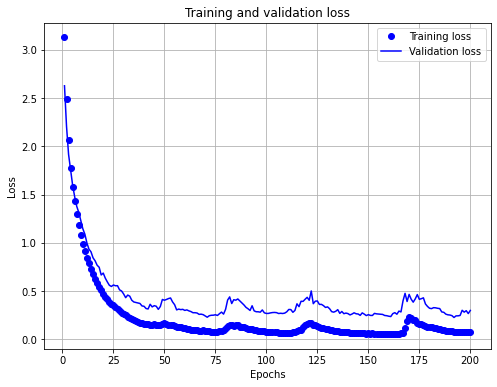

In [16]:
# Plot traing loss and validation loss
plot_loss(history_grid)

# Evaluate model by using validation set.
print(model_grid.evaluate(X_val,y_val))

## 3. Model Evaluation
**Evaluate the model per test set by checking confusion matrix, classification report, accuracy score and cohen kappa score.**

In [17]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, cohen_kappa_score

In [18]:
# Get predictions from the model.
pred = model_grid.predict(X_test)

# Print model performance: Confusion matrix, accuracy score and classification report.
print('Confusion matrix: \n', confusion_matrix(y_test.argmax(axis=1), pred.argmax(axis=1)), '\n')
print('Classification report: \n', classification_report(y_test.argmax(axis=1), pred.argmax(axis=1)), '\n') 
print('Accuracy on test set: ', accuracy_score(y_test.argmax(axis=1), pred.argmax(axis=1)), '\n')
print('cohen_kappa score：',cohen_kappa_score(y_test.argmax(axis=1), pred.argmax(axis=1)))

Confusion matrix: 
 [[37  2  0  2]
 [ 2 78 11  0]
 [ 4  4 69  1]
 [ 2  0  1 87]] 

Classification report: 
               precision    recall  f1-score   support

           0       0.82      0.90      0.86        41
           1       0.93      0.86      0.89        91
           2       0.85      0.88      0.87        78
           3       0.97      0.97      0.97        90

    accuracy                           0.90       300
   macro avg       0.89      0.90      0.90       300
weighted avg       0.91      0.90      0.90       300
 

Accuracy on test set:  0.9033333333333333 

cohen_kappa score： 0.8683673006218511


## 4. Save model

In [98]:
# Import necessary libraries
from tensorflow.keras.models import load_model

In [112]:
# Save trained model with help of keras.
model_grid.save('Model/NNTaskB.h5')